<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install the library for NFL Data
!pip install nfl_data_py

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

import nfl_data_py as nfl

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df2022 = nfl.import_pbp_data([2022], downcast=True, cache=False, alt_path=None)
pd.set_option('display.max_columns', None)
df2022 = df2022.loc[df2022.season_type!='REG']

df2022.head()

2022 done.
Downcasting floats.


play_id          game_id old_game_id home_team away_team season_type  \
47841      1.0  2022_19_BAL_CIN  2023011502       CIN       BAL        POST   
47842     42.0  2022_19_BAL_CIN  2023011502       CIN       BAL        POST   
47843     57.0  2022_19_BAL_CIN  2023011502       CIN       BAL        POST   
47844     78.0  2022_19_BAL_CIN  2023011502       CIN       BAL        POST   
47845    107.0  2022_19_BAL_CIN  2023011502       CIN       BAL        POST   

       week posteam posteam_type defteam side_of_field  yardline_100  \
47841    19    None         None    None          None           NaN   
47842    19     CIN         home     BAL           BAL          35.0   
47843    19     CIN         home     BAL           CIN          75.0   
47844    19     CIN         home     BAL           CIN          69.0   
47845    19     CIN         home     BAL           CIN          66.0   

        game_date  quarter_seconds_remaining  half_seconds_remaining  \
47841  2023-01-15                      900.0                  1800.0   
47842  2023-01-15                      900.0                  1800.0   
47843  2023-01-15                      900.0                  1800.0   
47844  2023-01-15                      868.0                  1768.0   
47845  2023-01-15                      831.0                  1731.0   

       game_seconds_remaining game_half  quarter_end  drive   sp  qtr  down  \
47841                  3600.0     Half1          0.0    NaN  0.0  1.0   NaN   
47842                  3600.0     Half1          0.0    1.0  0.0  1.0   NaN   
47843                  3600.0     Half1          0.0    1.0  0.0  1.0   1.0   
47844                  3568.0     Half1          0.0    1.0  0.0  1.0   2.0   
47845                  3531.0     Half1          0.0    1.0  0.0  1.0   3.0   

       goal_to_go   time   yrdln  ydstogo  ydsnet  \
47841         0.0  15:00  BAL 35      0.0     NaN   
47842         0.0  15:00  BAL 35      0.0    54.0   
47843         0.0  15:00  CIN 25     10.0    54.0   
47844         0.0  14:28  CIN 31      4.0    54.0   
47845         0.0  13:51  CIN 34      1.0    54.0   

                                                    desc play_type  \
47841                                               GAME      None   
47842  9-J.Tucker kicks 65 yards from BAL 35 to end z...   kickoff   
47843  (15:00) (Shotgun) 28-J.Mixon left guard to CIN...       run   
47844  (14:28) (Shotgun) 9-J.Burrow pass short left t...      pass   
47845  (13:51) (Shotgun) 34-S.Perine up the middle to...       run   

       yards_gained  shotgun  no_huddle  qb_dropback  qb_kneel  qb_spike  \
47841           NaN      0.0        0.0          NaN       0.0       0.0   
47842           0.0      0.0        0.0          0.0       0.0       0.0   
47843           6.0      1.0        0.0          0.0       0.0       0.0   
47844           3.0      1.0        0.0          1.0       0.0       0.0   
47845           2.0      1.0        0.0          0.0       0.0       0.0   

       qb_scramble pass_length pass_location  air_yards  yards_after_catch  \
47841          0.0        None          None        NaN                NaN   
47842          0.0        None          None        NaN                NaN   
47843          0.0        None          None        NaN                NaN   
47844          0.0       short          left       -3.0                6.0   
47845          0.0        None          None        NaN                NaN   

      run_location run_gap field_goal_result  kick_distance  \
47841         None    None              None            NaN   
47842         None    None              None            NaN   
47843         left   guard              None            NaN   
47844         None    None              None            NaN   
47845       middle    None              None            NaN   

      extra_point_result two_point_conv_result  home_timeouts_remaining  \
47841               None                  None                      3.0

In [10]:
#Data import and cleaning
years = [2022]

df2022 = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df2022.reset_index(drop=True, inplace=True)
df2022 = df2022.loc[df2022.season_type=='REG']
#df2022 = df2022.loc[((df2022['play_type'].isin(['no_play', 'pass', 'run'])) | (df2022['play_type'] == '')) & (df2022['epa'].notna())]
df2022.loc[df2022['pass']==1, 'play_type'] = 'pass'
df2022.loc[df2022["rush"]==1, 'play_type'] = 'run'

df2022.reset_index(drop=True, inplace=True)
df2022.head()

2022 done.
Downcasting floats.


play_id          game_id old_game_id home_team away_team season_type  week  \
0      1.0  2022_01_BAL_NYJ  2022091107       NYJ       BAL         REG     1   
1     43.0  2022_01_BAL_NYJ  2022091107       NYJ       BAL         REG     1   
2     68.0  2022_01_BAL_NYJ  2022091107       NYJ       BAL         REG     1   
3     89.0  2022_01_BAL_NYJ  2022091107       NYJ       BAL         REG     1   
4    115.0  2022_01_BAL_NYJ  2022091107       NYJ       BAL         REG     1   

  posteam posteam_type defteam side_of_field  yardline_100   game_date  \
0    None         None    None          None           NaN  2022-09-11   
1     NYJ         home     BAL           BAL          35.0  2022-09-11   
2     NYJ         home     BAL           NYJ          78.0  2022-09-11   
3     NYJ         home     BAL           NYJ          59.0  2022-09-11   
4     NYJ         home     BAL           NYJ          59.0  2022-09-11   

   quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining  \
0                      900.0                  1800.0                  3600.0   
1                      900.0                  1800.0                  3600.0   
2                      896.0                  1796.0                  3596.0   
3                      869.0                  1769.0                  3569.0   
4                      865.0                  1765.0                  3565.0   

  game_half  quarter_end  drive   sp  qtr  down  goal_to_go   time   yrdln  \
0     Half1          0.0    NaN  0.0  1.0   NaN         0.0  15:00  BAL 35   
1     Half1          0.0    1.0  0.0  1.0   NaN         0.0  15:00  BAL 35   
2     Half1          0.0    1.0  0.0  1.0   1.0         0.0  14:56  NYJ 22   
3     Half1          0.0    1.0  0.0  1.0   1.0         0.0  14:29  NYJ 41   
4     Half1          0.0    1.0  0.0  1.0   2.0         0.0  14:25  NYJ 41   

   ydstogo  ydsnet                                               desc  \
0      0.0     NaN                                               GAME   
1      0.0    14.0  9-J.Tucker kicks 68 yards from BAL 35 to NYJ -...   
2     10.0    14.0  (14:56) 32-Mi.Carter left end to NYJ 41 for 19...   
3     10.0    14.0  (14:29) (No Huddle, Shotgun) 19-J.Flacco pass ...   
4     10.0    14.0  (14:25) (No Huddle, Shotgun) 32-Mi.Carter left...   

  play_type  yards_gained  shotgun  no_huddle  qb_dropback  qb_kneel  \
0      None           NaN      0.0        0.0          NaN       0.0   
1   kickoff           0.0      0.0        0.0          0.0       0.0   
2       run          19.0      0.0        0.0          0.0       0.0   
3      pass           0.0      1.0        1.0          1.0       0.0   
4       run           5.0      1.0        1.0          0.0       0.0   

   qb_spike  qb_scramble pass_length pass_location  air_yards  \
0       0.0          0.0        None          None        NaN   
1       0.0          0.0        None          None        NaN   
2       0.0          0.0        None          None        NaN   
3       0.0          0.0       short          left        0.0   
4       0.0          0.0        None          None        NaN   

   yards_after_catch run_location run_gap field_goal_result  kick_distance  \
0                NaN         None    None              None            NaN   
1                NaN         None    None              None            NaN   
2                NaN         left     end              None            NaN   
3                NaN         None    None              None            NaN   
4                NaN         left     end              None            NaN   

  extra_point_result two_point_conv_result  home_timeouts_remaining  \
0               None                  None                      3.0   
1               None                  None                      3.0   
2               None                  None                      3.0   
3               None                  None                      3.0   
4               None              

In [11]:
#Data import and cleaning
years = [2023]

df = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df.reset_index(drop=True, inplace=True)
df = df.loc[df.season_type=='REG']
#df = df.loc[(df.play_type.isin(['no_play','pass','run', '']))]
df.loc[df['pass']==1, 'play_type'] = 'pass'
df.loc[df["rush"]==1, 'play_type'] = 'run'

df.reset_index(drop=True, inplace=True)

2023 done.
Downcasting floats.


In [12]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

In [13]:
pen_team = df["penalty_team"]
df1 = pd.DataFrame(pen_team)

In [14]:
df1 = df1.dropna()

In [15]:
team = pen_team.value_counts()

In [16]:
pen = team.values
tm = team.index

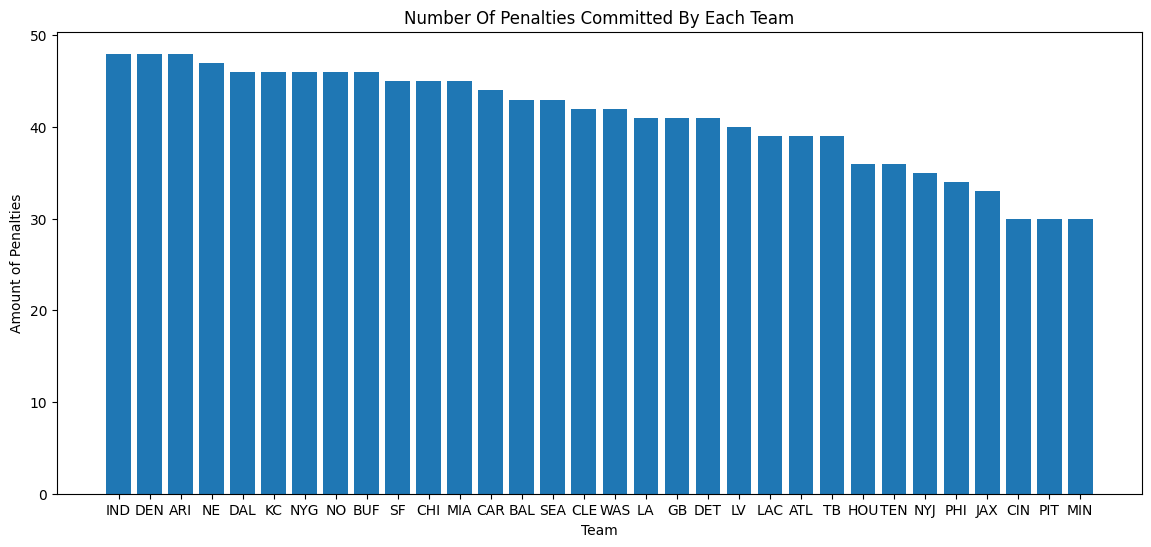

In [17]:
plt.figure(figsize=(14, 6))
plt.bar(tm, pen, width = .8)

plt.xlabel('Team')
plt.ylabel('Amount of Penalties')
plt.title('Number Of Penalties Committed By Each Team')

plt.show()

In [18]:
df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

In [19]:
stacked_df = df3.pivot(index='penalty_team', columns='down', values='count').fillna(0)

In [20]:
# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

In [21]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [22]:
team_base_color = [
    (151, 35, 63), (167, 25, 48), (36, 23, 115), (0, 51, 141), (0, 133, 202), (0, 20, 63), (251, 79, 20), (251, 79, 20),
    (176, 183, 188), (255, 128, 0), (4, 110, 180), (36, 66, 60), (201, 36, 63), (0, 61, 121), (19, 102, 119), (202, 36, 48),
    (0, 33, 71), (32, 114, 186), (196, 201, 204), (0, 145, 160), (79, 46, 132), (10, 35, 66), (160, 138, 88), (25, 46, 108),
    (32, 55, 49), (1, 74, 83), (255, 194, 14), (122, 193, 66), (201, 36, 63), (212, 9, 9), (64, 149, 209), (255, 194, 15)
]

lighter_colors = []
darker_colors = []
normal_colors = []
for color in team_base_color:

    r, g, b = color
    # Lighten the color by adding to each component
    r_lighter = min(255, r + 70)  # Increase the R component
    g_lighter = min(255, g + 70)  # Increase the G component
    b_lighter = min(255, b + 70)  # Increase the B component

    # Darken the color by subtracting from each component
    r_darker = max(0, r - 70)  # Decrease the R component
    g_darker = max(0, g - 70)  # Decrease the G component
    b_darker = max(0, b - 70)  # Decrease the B component

    # Append lighter and darker colors in RGB form to lists
    lighter_colors.append((r_lighter/255.0, g_lighter/255.00, b_lighter/255.0, 1.0))
    normal_colors.append((r/255.0, g/255.0, b/255.0, 1.0))
    darker_colors.append((r_darker/255.0, g_darker/255.0, b_darker/255.0, 1.0))

RGBA_colors = [lighter_colors, normal_colors, darker_colors]
print(RGBA_colors)

[[(0.8666666666666667, 0.4117647058823529, 0.5215686274509804, 1.0), (0.9294117647058824, 0.37254901960784315, 0.4627450980392157, 1.0), (0.41568627450980394, 0.36470588235294116, 0.7254901960784313, 1.0), (0.27450980392156865, 0.4745098039215686, 0.8274509803921568, 1.0), (0.27450980392156865, 0.796078431372549, 1.0, 1.0), (0.27450980392156865, 0.35294117647058826, 0.5215686274509804, 1.0), (1.0, 0.5843137254901961, 0.35294117647058826, 1.0), (1.0, 0.5843137254901961, 0.35294117647058826, 1.0), (0.9647058823529412, 0.9921568627450981, 1.0, 1.0), (1.0, 0.7764705882352941, 0.27450980392156865, 1.0), (0.2901960784313726, 0.7058823529411765, 0.9803921568627451, 1.0), (0.41568627450980394, 0.5333333333333333, 0.5098039215686274, 1.0), (1.0, 0.41568627450980394, 0.5215686274509804, 1.0), (0.27450980392156865, 0.5137254901960784, 0.7490196078431373, 1.0), (0.34901960784313724, 0.6745098039215687, 0.7411764705882353, 1.0), (1.0, 0.41568627450980394, 0.4627450980392157, 1.0), (0.27450980392156

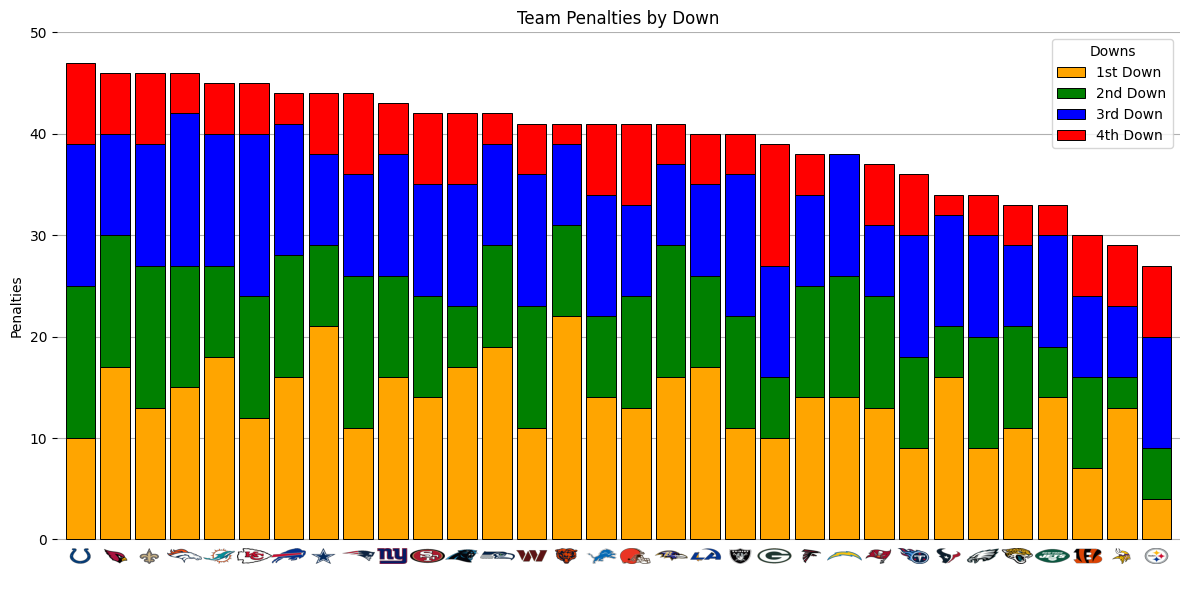

In [23]:
colors = ['orange', 'green', 'blue', 'red']

ax = sorted_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.85, color=colors, edgecolor='black', linewidth=0.7, zorder=3)

# Add labels
plt.xlabel('Teams')
plt.ylabel('Penalties')
plt.title('Team Penalties by Down')

# Add images
for i, team_name in enumerate(sorted_df.index):
  img_path = image_paths.get(team_name)
  img = mpimg.imread(img_path)
  ax.imshow(img, extent=[i - 0.5, i + 0.5, -2.4, -0.9], aspect='auto', alpha=1, zorder=5)

# Add legend
legend_labels = ['1st Down', '2nd Down', '3rd Down', '4th Down ']
plt.legend(legend_labels, title = "Downs")

ax.set_ylim([-4, (team_totals).values.max() + 3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(zorder=0)

# Show the graph
plt.tight_layout()
plt.show()

In [24]:
down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

In [25]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

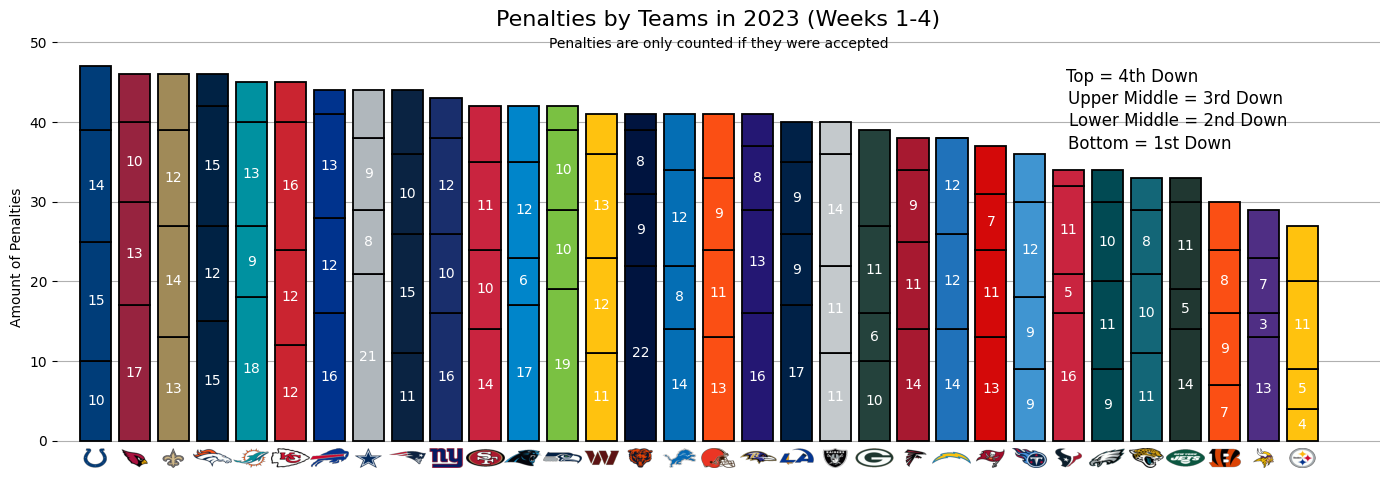

In [26]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

# Color
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

team_colors = [teamcolor.get(team) for team in sorted_df.index]

fig, ax = plt.subplots(figsize = (14,5))

index = np.arange(len(sorted_df.index))

lwidth = 1.3

ax.bar(index, down1, color=team_colors, edgecolor='k', linewidth=lwidth, zorder = 4)
ax.bar(index, down2, bottom=down1, color=team_colors,edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down3, bottom=[d1 + d2 for d1, d2 in zip(down1, down2)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down4, bottom=[d1 + d2 + d3 for d1, d2, d3 in zip(down1, down2, down3)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)

for i in range(len(sorted_df.index)):
    # Calculate the total height of the bar for this team
    total_height = down1[i] + down2[i] + down3[i] + down4[i]

    # Add labels for each segment (1st, 2nd, 3rd, 4th down)
    ax.text(i, down1[i] / 2, str(int(down1[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] / 2), str(int(down2[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] + down3[i] / 2), str(int(down3[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)

for i in range(len(sorted_df.index)):
    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.50, -3.4 ,-1], aspect='auto', zorder=3)


# Add labels
ax.set_ylabel('Amount of Penalties')
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)')

# Add a main title
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)', fontsize=16)

# Add a subtitle
subtitle = 'Penalties are only counted if they were accepted'
plt.text(0.5, 0.97, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.text(0.863, 0.925, "Top = 4th Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.927, 0.875, "Upper Middle = 3rd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.93, 0.825, "Lower Middle = 2nd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.888, 0.775, "Bottom = 1st Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, (team_totals).values.max() + 4])
plt.xlim([-1, 33])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(0, 32, 1))

ax.grid(zorder=0)
ax.xaxis.set_visible(False)


# Show the graph
plt.tight_layout()
plt.show()

In [27]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [28]:
pass_df = df[df['play_type'] == "pass"]
pass_df.head()

play_id          game_id old_game_id home_team away_team season_type  week  \
3     77.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
5    124.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
6    147.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
7    172.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
8    197.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   

  posteam posteam_type defteam side_of_field  yardline_100   game_date  \
3     WAS         home     ARI           WAS          72.0  2023-09-10   
5     WAS         home     ARI           WAS          64.0  2023-09-10   
6     WAS         home     ARI           WAS          64.0  2023-09-10   
7     WAS         home     ARI           WAS          52.0  2023-09-10   
8     WAS         home     ARI           WAS          51.0  2023-09-10   

   quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining  \
3                      870.0                  1770.0                  3570.0   
5                      796.0                  1696.0                  3496.0   
6                      792.0                  1692.0                  3492.0   
7                      754.0                  1654.0                  3454.0   
8                      716.0                  1616.0                  3416.0   

  game_half  quarter_end  drive   sp  qtr  down  goal_to_go   time   yrdln  \
3     Half1          0.0    1.0  0.0  1.0   2.0         0.0  14:30  WAS 28   
5     Half1          0.0    1.0  0.0  1.0   1.0         0.0  13:16  WAS 36   
6     Half1          0.0    1.0  0.0  1.0   2.0         0.0  13:12  WAS 36   
7     Half1          0.0    1.0  0.0  1.0   1.0         0.0  12:34  WAS 48   
8     Half1          0.0    1.0  0.0  1.0   2.0         0.0  11:56  WAS 49   

   ydstogo  ydsnet                                               desc  \
3      7.0    26.0  (14:30) (Shotgun) 14-S.Howell pass short right...   
5     10.0    26.0  (13:16) (Shotgun) 14-S.Howell pass incomplete ...   
6     10.0    26.0  (13:12) 14-S.Howell pass short middle to 1-J.D...   
7     10.0    26.0  (12:34) (Shotgun) 14-S.Howell pass short left ...   
8      9.0    26.0  (11:56) (Shotgun) 14-S.Howell pass incomplete ...   

  play_type  yards_gained  shotgun  no_huddle  qb_dropback  qb_kneel  \
3      pass           6.0      1.0        0.0          1.0       0.0   
5      pass           0.0      1.0        0.0          1.0       0.0   
6      pass          12.0      0.0        0.0          1.0       0.0   
7      pass           1.0      1.0        0.0          1.0       0.0   
8      pass           0.0      1.0        0.0          1.0       0.0   

   qb_spike  qb_scramble pass_length pass_location  air_yards  \
3       0.0          0.0       short         right        6.0   
5       0.0          0.0       short        middle       10.0   
6       0.0          0.0       short        middle       12.0   
7       0.0          0.0       short          left       -4.0   
8       0.0          0.0       short          left        3.0   

   yards_after_catch run_location run_gap field_goal_result  kick_distance  \
3                0.0         None    None              None            NaN   
5                NaN         None    None              None            NaN   
6                0.0         None    None              None            NaN   
7                5.0         None    None              None            NaN   
8                NaN         None    None              None            NaN   

  extra_point_result two_point_conv_result  home_timeouts_remaining  \
3               None                  None                      3.0   
5               None                  None                      3.0   
6               None                  None                      3.0   
7               None                  None                      3.0   
8               None              

In [29]:
filt = pass_df.groupby('posteam')['qb_epa'].sum()
plays = pass_df['posteam'].value_counts()

In [30]:
plays = plays.sort_index()
plays.head()

ARI    277
ATL    274
BAL    271
BUF    292
CAR    289
Name: posteam, dtype: int64

In [31]:
filt = filt.sort_index()
filt.head()

posteam
ARI   -27.850128
ATL    -8.485989
BAL    27.922995
BUF    77.309494
CAR   -27.619505
Name: qb_epa, dtype: float32

In [32]:
qb_epa_per_play = filt / plays

In [33]:
fin = df[df["desc"] == "END GAME"]

In [34]:
home_pts = fin.groupby('home_team')['total_home_score'].sum()

away_pts = fin.groupby('away_team')['total_away_score'].sum()


total_pts = home_pts + away_pts
#total_pts.head()

tot_pt = total_pts.values
team = total_pts.index
#print(tot_pt)
#print(team)

total_pts.head()

home_team
ARI    127.0
ATL    115.0
BAL    171.0
BUF    198.0
CAR    112.0
dtype: float32

In [35]:
coefficients = np.polyfit(qb_epa_per_play, tot_pt, 1)
print(coefficients[1])
print(coefficients[0])

135.64357042610487
185.21447331342316


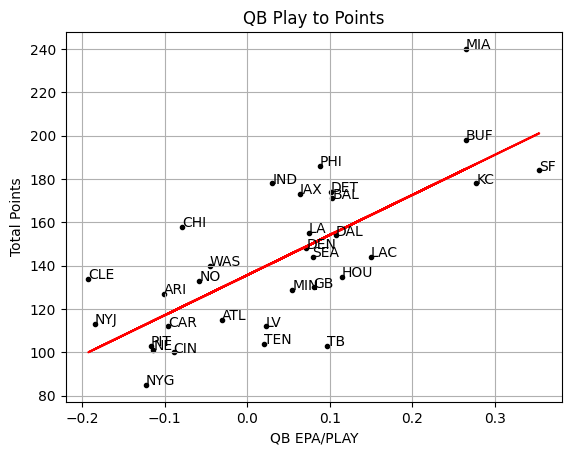

In [36]:
plt.scatter(qb_epa_per_play, tot_pt, marker='.', color='black')

for i, team in enumerate(plays.index):
    plt.annotate(team, (qb_epa_per_play[i], tot_pt[i]))

trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]

plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/PLAY')
plt.ylabel('Total Points')
plt.title('QB Play to Points')
plt.grid(True)

plt.show()

In [37]:
logo_images = []
for team in plays.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

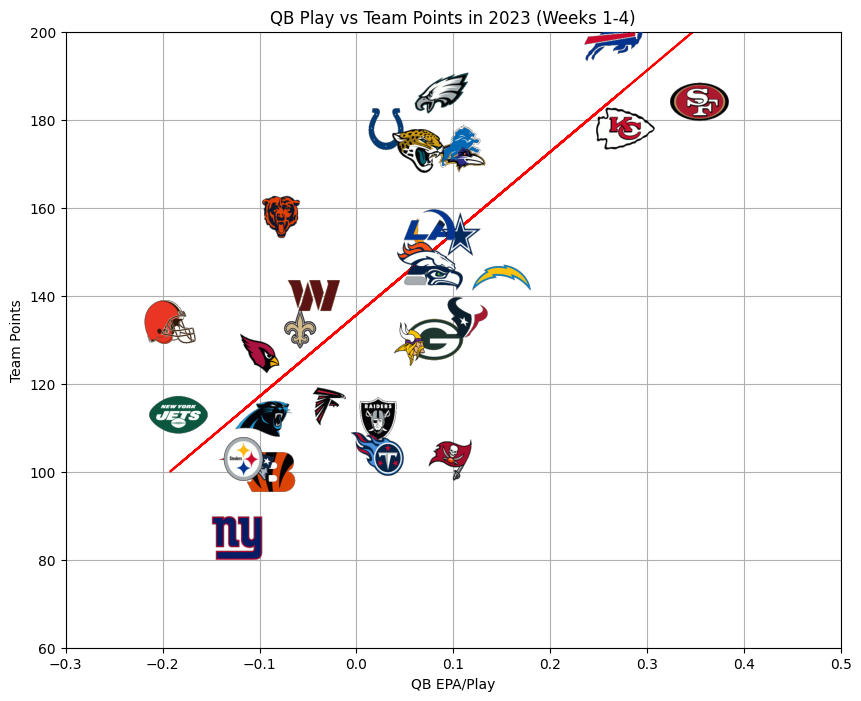

In [38]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Scatter plot with markers replaced by logos
for i in range(len(qb_epa_per_play)):
    x, y, team = qb_epa_per_play[i], tot_pt[i], plays.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.03, x+0.03, y-5, y+5], aspect='auto', zorder=3)

# Trendline
trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]
plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/Play')
plt.ylabel('Team Points')
plt.title('QB Play vs Team Points in 2023 (Weeks 1-4)')
plt.grid(True)

plt.ylim(60,200)
plt.xlim(-0.3,0.5)

plt.show()

QB BIAS

In [39]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [40]:
pass_filt = df[df['pass_location'].isin(["middle", "right", "left"])]

pass_loc = pass_filt[['posteam', 'pass_location']]

In [41]:
total_pass = pass_loc.groupby('posteam').value_counts()

In [42]:
pass_group = pass_loc.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

In [43]:
total_pass = pass_group.groupby("posteam")["count"].sum().reset_index()

total_pass = total_pass.loc[np.repeat(total_pass.index, 3)].reset_index(drop=True)

tot_pass = pd.DataFrame(total_pass)
tot_pass.head()

posteam  count
0     ARI    230
1     ARI    230
2     ARI    230
3     ATL    228
4     ATL    228

In [44]:
pass_group["percent_loc"] = pass_group["count"] / tot_pass["count"] * 100

In [45]:
# Pivot the DataFrame to separate pass_location into columns
piv_pass_group = pass_group.pivot(index='posteam', columns='pass_location', values='percent_loc')

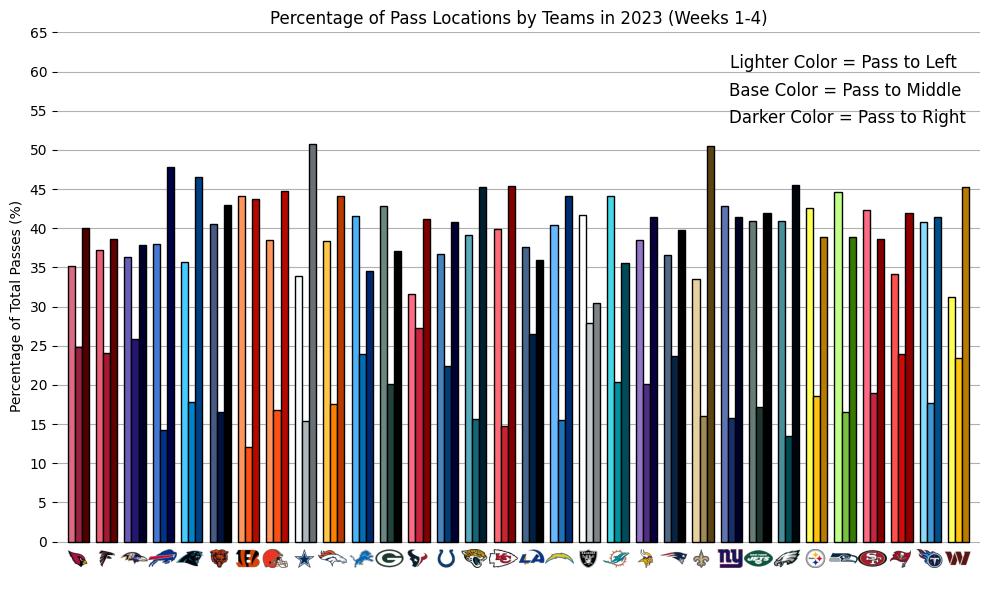

In [46]:
# Get the list of teams and their corresponding index
teams = piv_pass_group.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2023 (Weeks 1-4)')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.975, 0.96, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.98, 0.91, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.985, 0.86, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
#2022 Bias Data
pass_filt2022 = df2022[df2022['pass_location'].isin(["middle", "right", "left"])]

pass_loc2022 = pass_filt2022[['posteam', 'pass_location']]

total_pass2022 = pass_loc2022.groupby('posteam').value_counts()

pass_group2022 = pass_loc2022.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

total_pass2022 = pass_group2022.groupby("posteam")["count"].sum().reset_index()

total_pass2022 = total_pass2022.loc[np.repeat(total_pass2022.index, 3)].reset_index(drop=True)

tot_pass2022 = pd.DataFrame(total_pass2022)

pass_group2022["percent_loc"] = pass_group2022["count"] / tot_pass2022["count"] * 100

# Pivot the DataFrame to separate pass_location into columns
piv_pass_group2022 = pass_group2022.pivot(index='posteam', columns='pass_location', values='percent_loc')

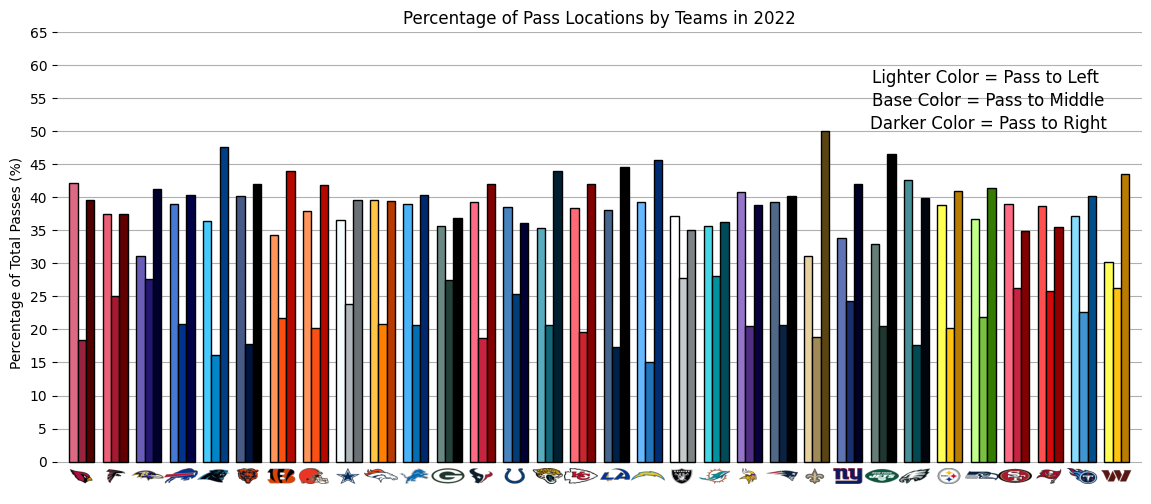

In [48]:
# Get the list of teams and their corresponding index
teams = piv_pass_group2022.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group2022[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2022')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
#plt.tight_layout()
plt.show()

In [49]:
pass_group["percent_diff"] = pass_group["percent_loc"] - pass_group2022["percent_loc"]

# Pivot the DataFrame to separate pass_location into columns
piv_passdif = pass_group.pivot(index='posteam', columns='pass_location', values='percent_diff')

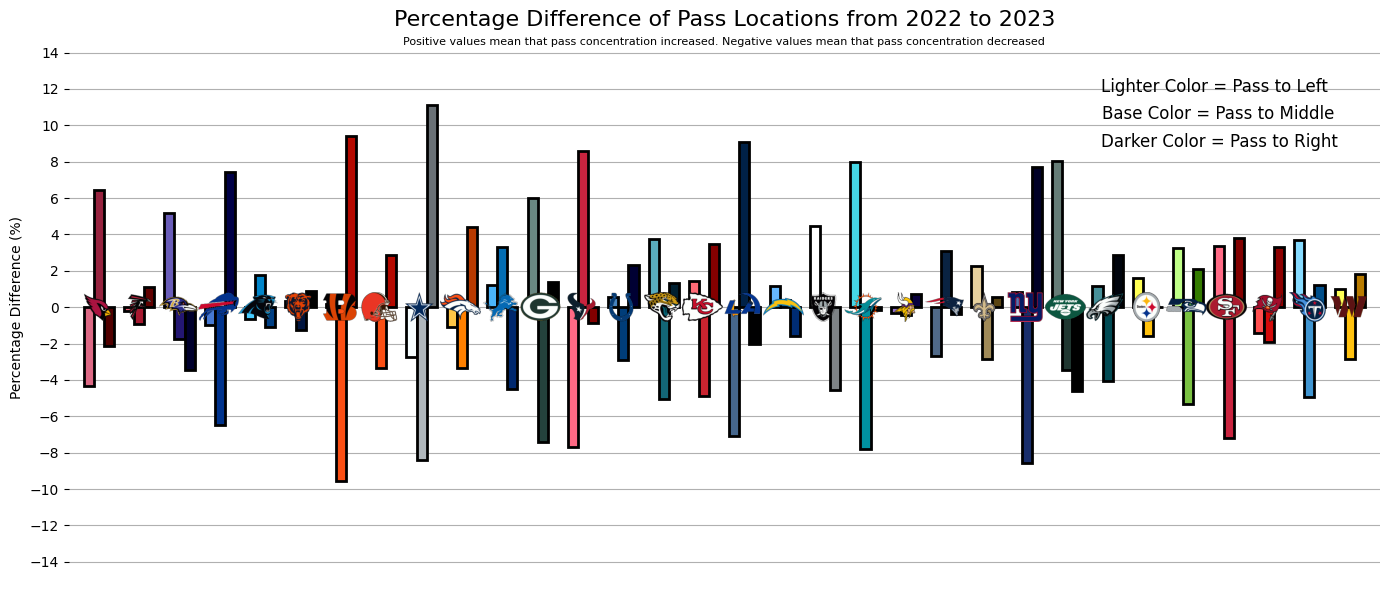

In [50]:
# Get the list of teams and their corresponding index
teams = piv_passdif.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_passdif[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=2, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -0.8 ,0.8], aspect='auto', zorder=7)


ax.set_ylabel('Percentage Difference (%)')

# Add a main title
ax.set_title('Percentage Difference of Pass Locations from 2022 to 2023', fontsize=16)

# Add a subtitle
subtitle = 'Positive values mean that pass concentration increased. Negative values mean that pass concentration decreased'
plt.text(0.5, 0.98, subtitle, fontsize=8, ha='center', transform=ax.transAxes)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.ylim([-15, 15])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(-14, 16, 2))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
qb2023 = nfl.import_weekly_data([2023])

qb2023 = qb2023[qb2023["position"] == "QB"]

Downcasting floats.


In [52]:
qb2023 = qb2023[["player_name", "recent_team", "attempts", "passing_yards", "passing_air_yards", "passing_yards_after_catch", "sacks", "passing_epa"]]
qb2023["passing_plays"] = qb2023["attempts"] + qb2023["sacks"]

In [53]:
# Group and aggregate the data
group_qb2023 = qb2023.groupby("player_name").agg({
    "passing_plays": "sum",
    "attempts": "sum",
    "passing_epa": "sum",
    "passing_air_yards": "sum",
    "passing_yards": "sum",
    "passing_yards_after_catch": "sum",
    "recent_team": "first"  # Include the team information
}).reset_index()

group_qb2023["percent_yac"] = group_qb2023["passing_yards_after_catch"] / group_qb2023["passing_yards"] * 100
group_qb2023["passing_epa_per_play"] = group_qb2023["passing_epa"] / group_qb2023["passing_plays"]
group_qb2023["adot"] = group_qb2023["passing_air_yards"] / group_qb2023["attempts"]


group_qb2023 = group_qb2023[group_qb2023["passing_plays"] > 50].reset_index(drop=True)

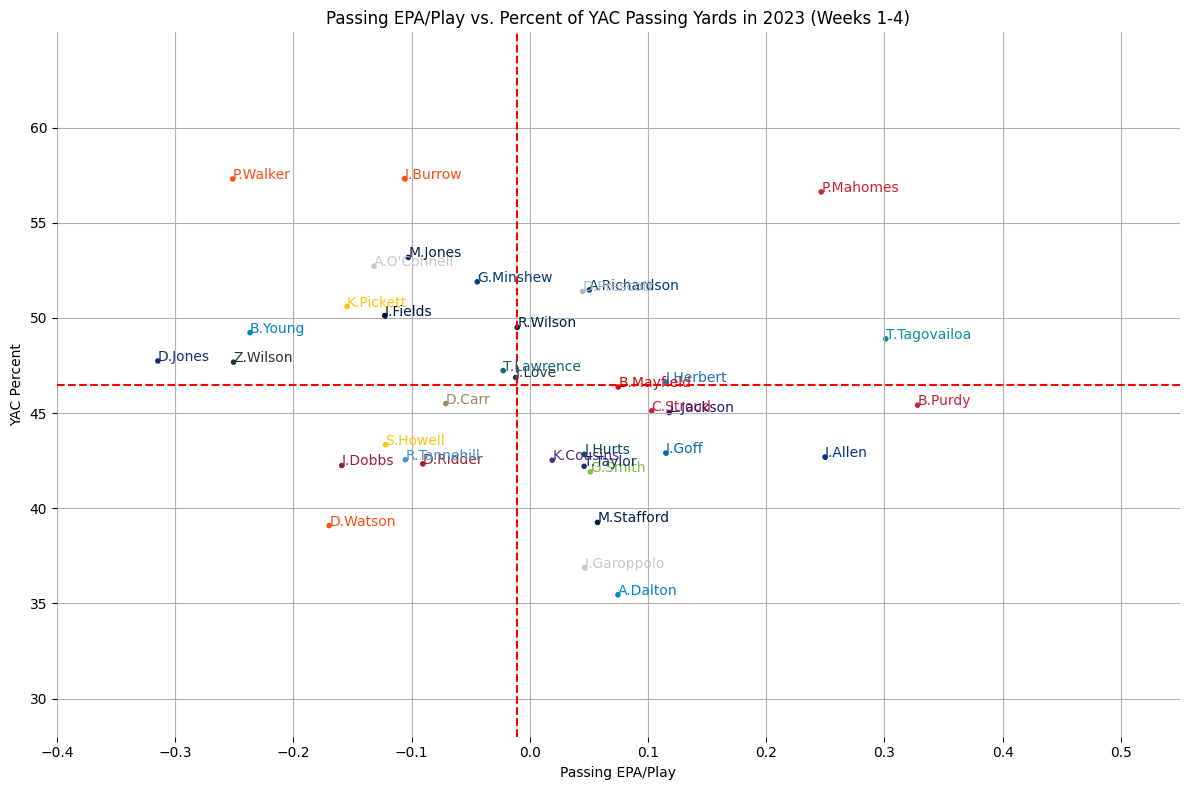

In [54]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["percent_yac"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["percent_yac"][i]), color=qb_colors[i])

mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["percent_yac"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.ylim([28, 65])
plt.xlim([-0.4, 0.55])
plt.yticks(np.arange(30, 65, 5))
plt.xticks(np.arange(-0.4, 0.55, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('YAC Percent')
ax.set_title('Passing EPA/Play vs. Percent of YAC Passing Yards in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

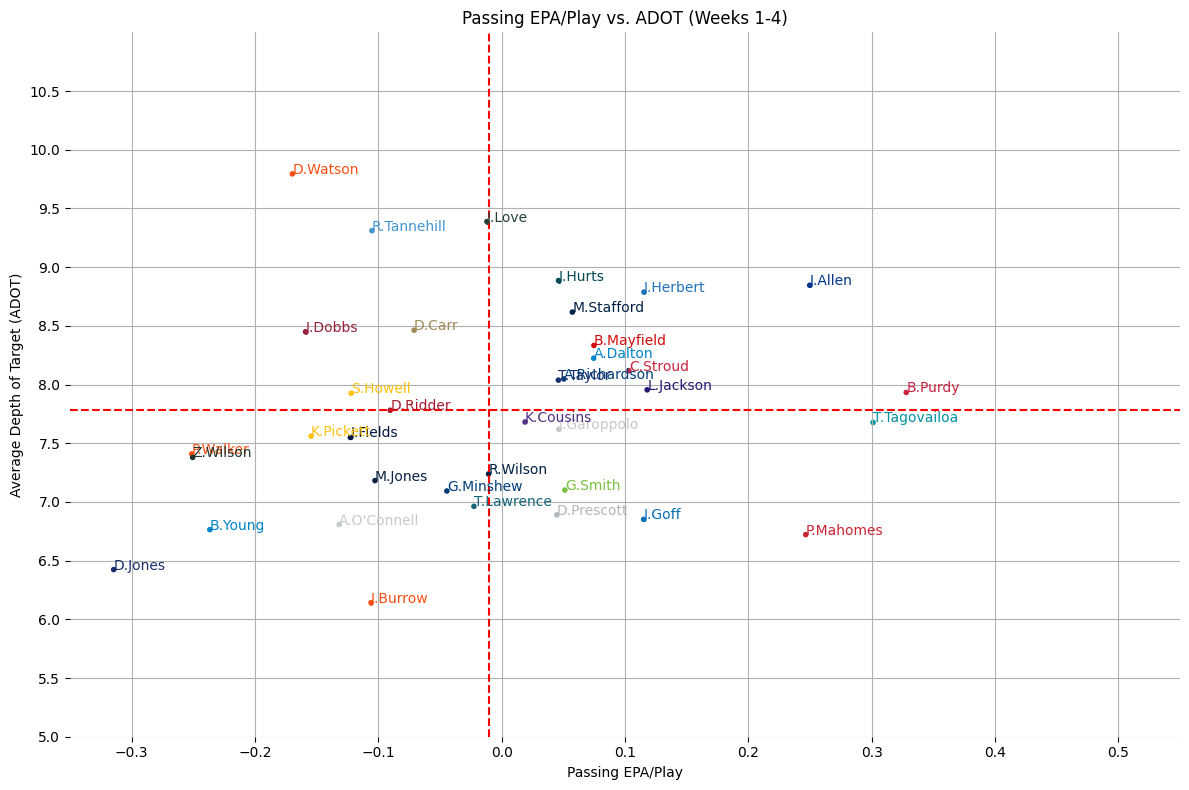

In [55]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["adot"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["adot"][i]), color=qb_colors[i])

# Mean Lines
mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["adot"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# Axes
plt.ylim([5, 11])
plt.xlim([-0.35, 0.55])
plt.yticks(np.arange(5, 11, 0.5))
plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('Average Depth of Target (ADOT)')
ax.set_title('Passing EPA/Play vs. ADOT (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [56]:
ngs_receiving2023 = nfl.import_ngs_data("receiving", [2023])
ngs_receiving2023.head()


ngs_receiving2023 = ngs_receiving2023[ngs_receiving2023["week"] == 0].reset_index(drop=True)
ngs_receiving2023 = ngs_receiving2023[ngs_receiving2023["targets"] > 15].reset_index(drop=True)

ngs_receiving2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   season                               110 non-null    int32  
 1   season_type                          110 non-null    object 
 2   week                                 110 non-null    int32  
 3   player_display_name                  110 non-null    object 
 4   player_position                      110 non-null    object 
 5   team_abbr                            110 non-null    object 
 6   avg_cushion                          110 non-null    float64
 7   avg_separation                       110 non-null    float64
 8   avg_intended_air_yards               110 non-null    float64
 9   percent_share_of_intended_air_yards  110 non-null    float64
 10  receptions                           110 non-null    int32  
 11  targets                         

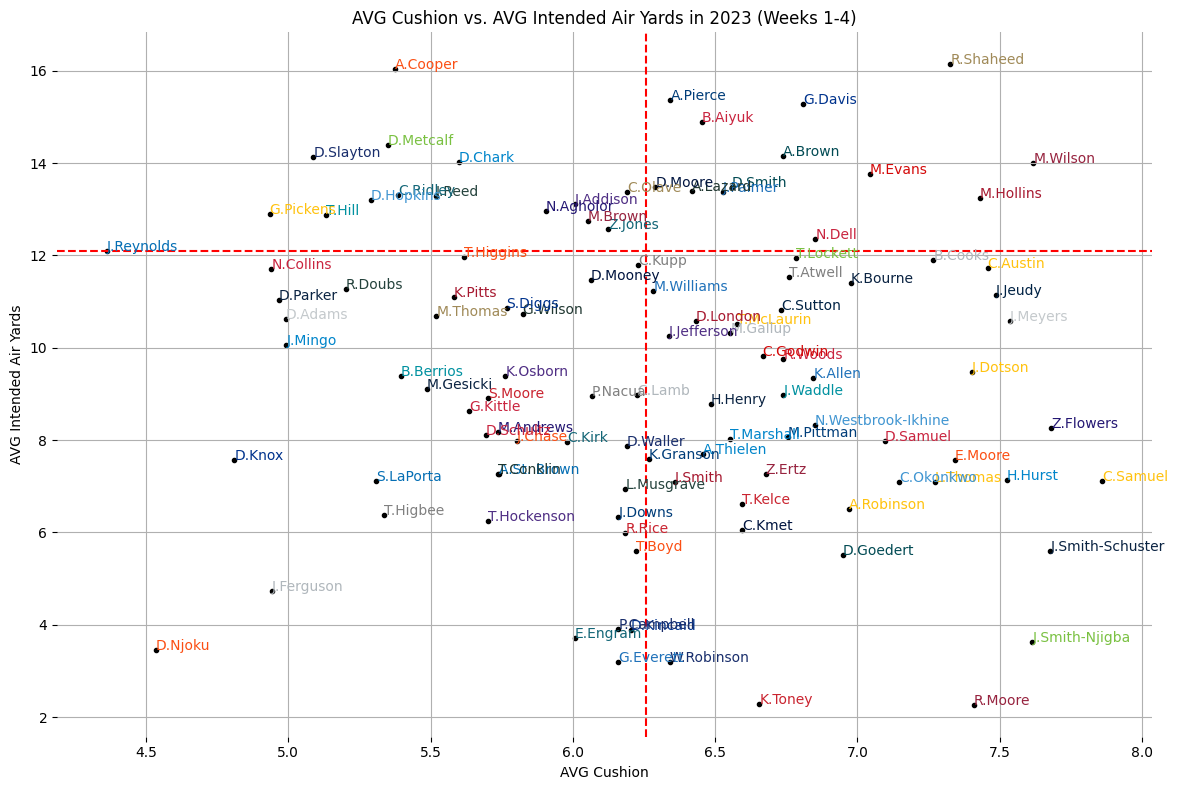

In [57]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

rec_colors = [teamcolor.get(team, "gray") for team in ngs_receiving2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs_receiving2023["avg_cushion"], ngs_receiving2023["avg_intended_air_yards"], marker='.', color="black")

for i, player_name in enumerate(ngs_receiving2023["player_short_name"]):
    ax.annotate(player_name, (ngs_receiving2023["avg_cushion"][i], ngs_receiving2023["avg_intended_air_yards"][i]), color=rec_colors[i])

mean_x = np.mean(ngs_receiving2023["avg_cushion"])
mean_y = np.mean(ngs_receiving2023["avg_intended_air_yards"][i])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# plt.ylim([5, 11])
# plt.xlim([-0.35, 0.55])
# plt.yticks(np.arange(5, 11, 0.5))
# plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('AVG Cushion')
ax.set_ylabel('AVG Intended Air Yards')
ax.set_title('AVG Cushion vs. AVG Intended Air Yards in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
ngs_passing2023 = nfl.import_ngs_data("passing", [2023])

ngs_passing2023 = ngs_passing2023[ngs_passing2023["week"] == 0].reset_index(drop=True)
ngs_passing2023 = ngs_passing2023[ngs_passing2023["attempts"] > 15].reset_index(drop=True)

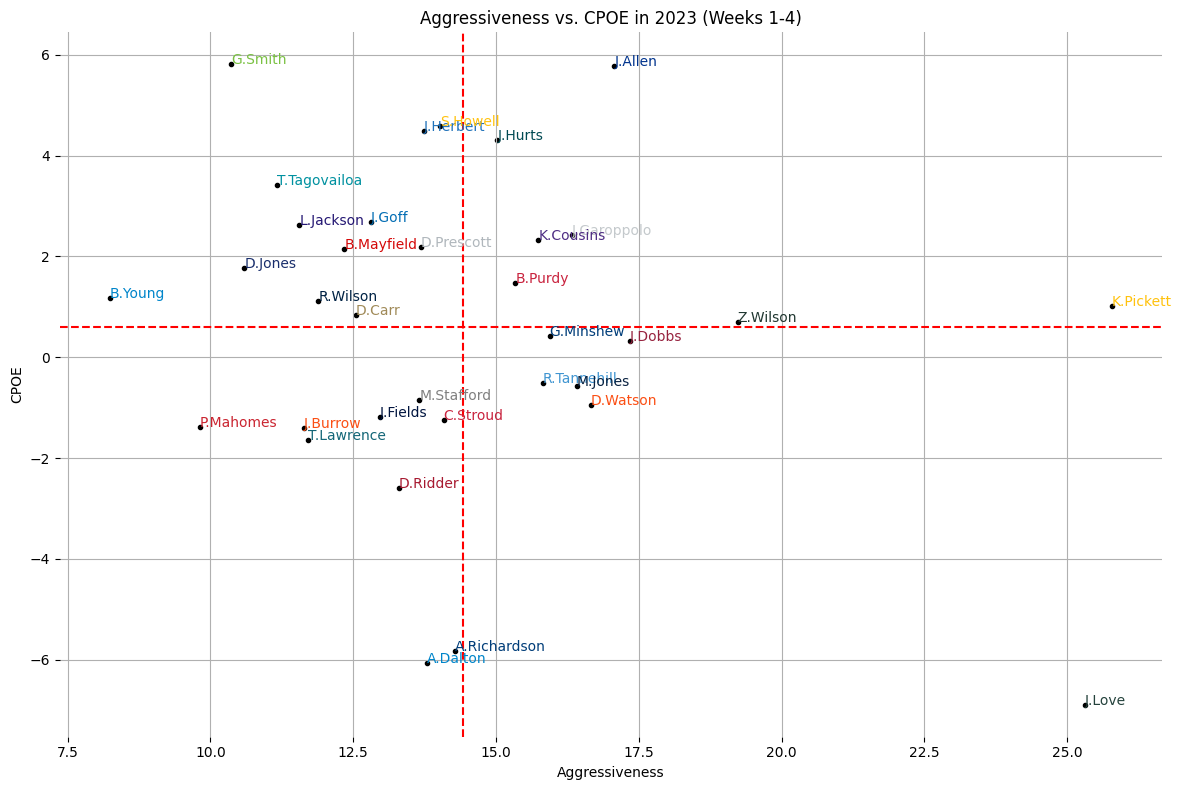

In [59]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

pass_colors = [teamcolor.get(team, "gray") for team in ngs_passing2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs_passing2023["aggressiveness"], ngs_passing2023["completion_percentage_above_expectation"], marker='.', color="black")

for i, player_name in enumerate(ngs_passing2023["player_short_name"]):
    ax.annotate(player_name, (ngs_passing2023["aggressiveness"][i], ngs_passing2023["completion_percentage_above_expectation"][i]), color=pass_colors[i])

mean_x = np.mean(ngs_passing2023["aggressiveness"])
mean_y = np.mean(ngs_passing2023["completion_percentage_above_expectation"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')


ax.set_xlabel('Aggressiveness')
ax.set_ylabel('CPOE')
ax.set_title('Aggressiveness vs. CPOE in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [60]:
pbp = nfl.import_pbp_data(years, downcast=True)
pd.set_option('display.max_columns', None)

2023 done.
Downcasting floats.


In [61]:
pbp = pbp[pbp["play_type"].isin(["pass", "run"])].reset_index(drop=True)

per_play = pbp.groupby(["posteam", "play_type"]).size().reset_index()

group_pbp = pbp.groupby(["posteam", "play_type"])["epa"].sum().reset_index()

pass_pbp = group_pbp[group_pbp["play_type"] == "pass"].reset_index(drop=True)
run_pbp = group_pbp[group_pbp["play_type"] == "run"].reset_index(drop=True)

per_play = per_play.rename(columns={0: "play_count"})

pass_play = per_play[per_play["play_type"] == "pass"].reset_index(drop=True)
run_play = per_play[per_play["play_type"] == "run"].reset_index(drop=True)

pass_pbp["pass_epa_per_play"] = pass_pbp["epa"] / pass_play["play_count"]
run_pbp["run_epa_per_play"] = run_pbp["epa"] / run_play["play_count"]

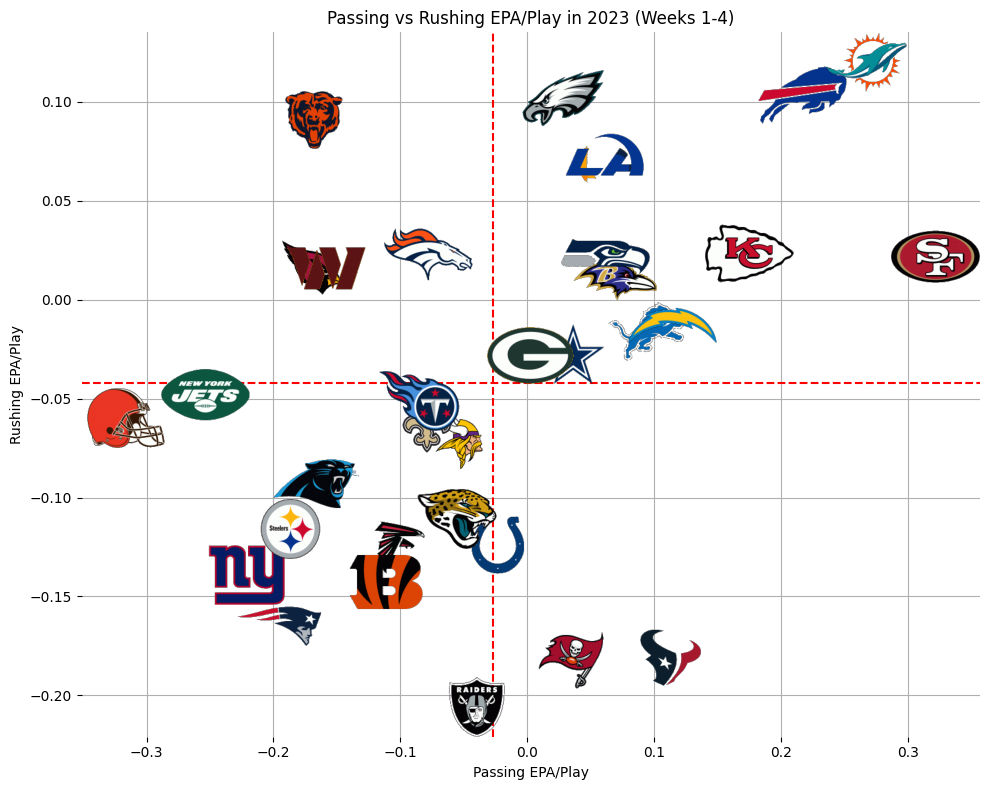

In [62]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Scatter plot with markers replaced by logos
for i in range(len(pass_pbp["pass_epa_per_play"])):
    x, y, team = pass_pbp["pass_epa_per_play"][i], run_pbp["run_epa_per_play"][i], pass_pbp["posteam"][i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.035, x+0.035, y-0.015, y+0.015], aspect='auto', zorder=3)

mean_x = np.mean(pass_pbp["pass_epa_per_play"])
mean_y = np.mean(run_pbp["run_epa_per_play"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.xlabel('Passing EPA/Play')
plt.ylabel('Rushing EPA/Play')
plt.title('Passing vs Rushing EPA/Play in 2023 (Weeks 1-4)')
plt.grid(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

What percentage teams pass out of each Formation and Personel

In [63]:
form_data = nfl.import_pbp_data([2023], downcast=True)
form_data = form_data[["play_type", "offense_formation"]]
form_data = form_data[(form_data["play_type"] == "pass") | (form_data["play_type"] == "run")]

form_data_group = form_data.groupby(["play_type","offense_formation"]).size().reset_index(name = "count")
pass_form = form_data_group[form_data_group["play_type"] == "pass"]
pass_percent_data = form_data_group.groupby("offense_formation")["count"].sum().reset_index()

pass_percent_data["pass_percentage"] = (pass_form["count"] / pass_percent_data["count"]) * 100
pass_percent_data = pass_percent_data.sort_values(by= "pass_percentage", ascending=False).reset_index()

2023 done.
Downcasting floats.


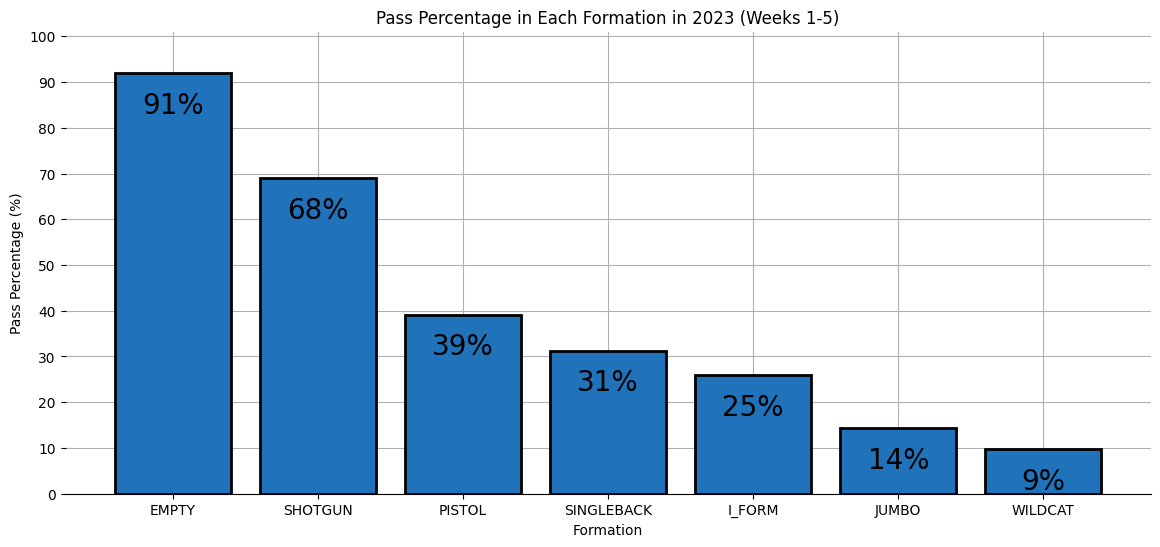

In [64]:
plt.figure(figsize=(14, 6))
plt.bar(pass_percent_data["offense_formation"], pass_percent_data["pass_percentage"], width = .8, color = (32/255, 114/255, 186/255), edgecolor = "k", linewidth = 2, zorder = 5)

for i in range(len(pass_percent_data)):
  plt.text(i, pass_percent_data["pass_percentage"][i]-7, f'{int(pass_percent_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)

plt.xlabel('Formation')
plt.ylabel('Pass Percentage (%)')
plt.title('Pass Percentage in Each Formation in 2023 (Weeks 1-5)')

plt.grid(True)

plt.ylim(0, 101)
plt.yticks(np.arange(0, 101, 10))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [65]:
pers_data = nfl.import_pbp_data([2023], downcast=True)
pers_data = pers_data[["play_type", "offense_personnel"]]
pers_data = pers_data[(pers_data["play_type"] == "pass") | (pers_data["play_type"] == "run")]



pers_data_group = pers_data.groupby(["play_type","offense_personnel"]).size().reset_index(name = "count").sort_values(by = "count")
pers_data_group = pers_data_group[pers_data_group["count"] > 10]
pers_data_group.head(100)

pers_form = pers_data_group[pers_data_group["play_type"] == "pass"].reset_index(drop=True)
pass_pers_percent = pers_data_group.groupby("offense_personnel")["count"].sum().reset_index()

personnel_data = pers_form.merge(pass_pers_percent, on='offense_personnel', suffixes=('_pass', '_play_total'))
personnel_data["pass_percentage"] = (personnel_data["count_pass"] / personnel_data["count_play_total"] * 100)
personnel_data = personnel_data.sort_values(by = "pass_percentage", ascending = False).reset_index()

personnel_data = personnel_data[personnel_data.index > 2].reset_index()

2023 done.
Downcasting floats.


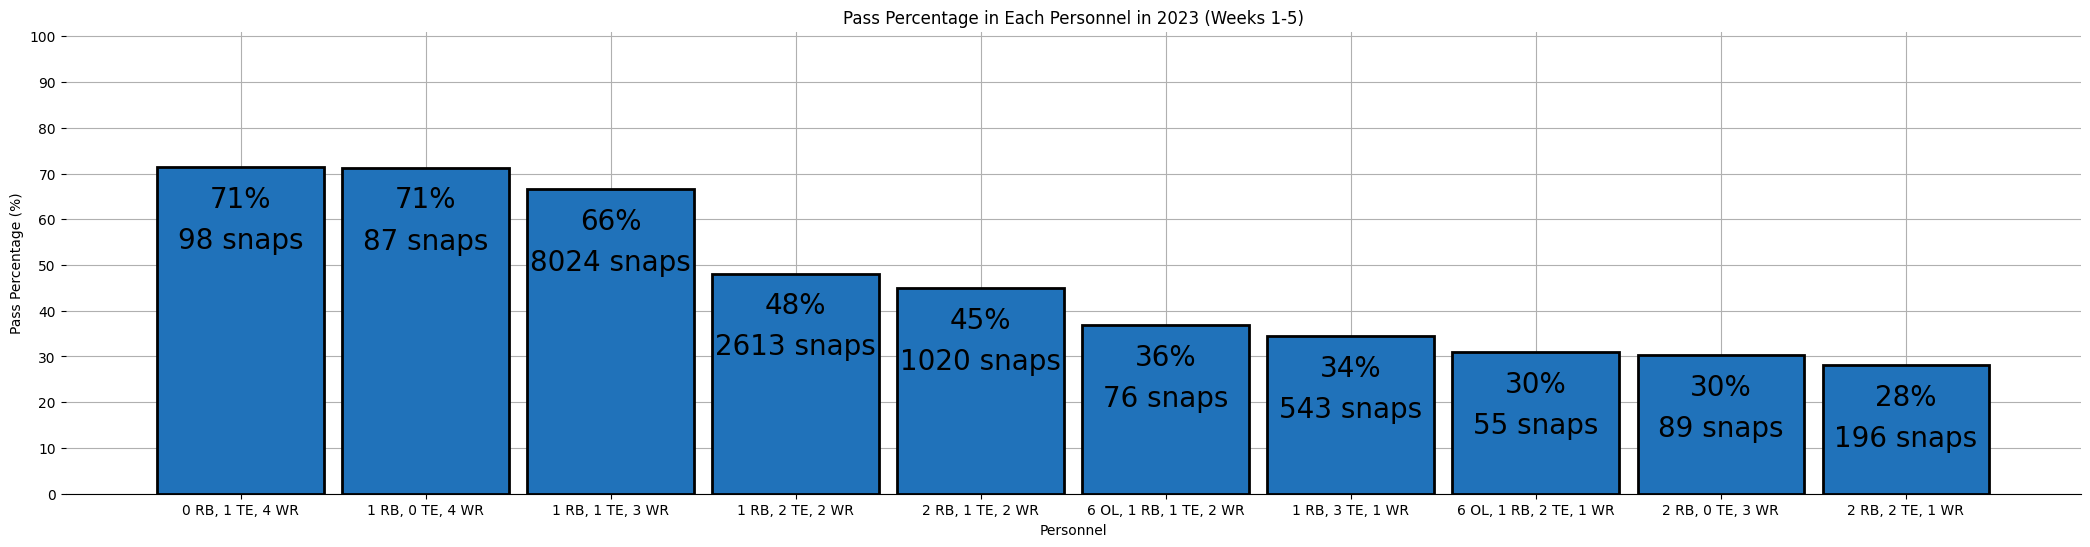

In [66]:
plt.figure(figsize=(26, 6))

plt.bar(personnel_data["offense_personnel"], personnel_data["pass_percentage"], width = 0.9, color = (32/255, 114/255, 186/255), edgecolor = "k", linewidth = 2, zorder = 5)

for i in range(len(personnel_data)):
  plt.text(i, personnel_data["pass_percentage"][i]-7, f'{int(personnel_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)
  plt.text(i, personnel_data["pass_percentage"][i]-16, f'{int(personnel_data["count_play_total"][i])} snaps', ha='center', va='center', color='k', fontsize=20, zorder = 10)

plt.xlabel('Personnel')
plt.ylabel('Pass Percentage (%)')
plt.title('Pass Percentage in Each Personnel in 2023 (Weeks 1-5)')

plt.grid(True)

plt.ylim(0, 101)
plt.yticks(np.arange(0, 101, 10))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [67]:
wp4th = nfl.import_pbp_data([2023], downcast=True)
wp4th.head()

2023 done.
Downcasting floats.


play_id          game_id old_game_id home_team away_team season_type  week  \
0      1.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
1     39.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
2     55.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
3     77.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
4    102.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   

  posteam posteam_type defteam side_of_field  yardline_100   game_date  \
0    None         None    None          None           NaN  2023-09-10   
1     WAS         home     ARI           ARI          35.0  2023-09-10   
2     WAS         home     ARI           WAS          75.0  2023-09-10   
3     WAS         home     ARI           WAS          72.0  2023-09-10   
4     WAS         home     ARI           WAS          66.0  2023-09-10   

   quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining  \
0                      900.0                  1800.0                  3600.0   
1                      900.0                  1800.0                  3600.0   
2                      900.0                  1800.0                  3600.0   
3                      870.0                  1770.0                  3570.0   
4                      835.0                  1735.0                  3535.0   

  game_half  quarter_end  drive   sp  qtr  down  goal_to_go   time   yrdln  \
0     Half1          0.0    NaN  0.0  1.0   NaN         0.0  15:00  ARI 35   
1     Half1          0.0    1.0  0.0  1.0   NaN         0.0  15:00  ARI 35   
2     Half1          0.0    1.0  0.0  1.0   1.0         0.0  15:00  WAS 25   
3     Half1          0.0    1.0  0.0  1.0   2.0         0.0  14:30  WAS 28   
4     Half1          0.0    1.0  0.0  1.0   3.0         0.0  13:55  WAS 34   

   ydstogo  ydsnet                                               desc  \
0      0.0     NaN                                               GAME   
1      0.0    26.0  5-M.Prater kicks 65 yards from ARI 35 to end z...   
2     10.0    26.0  (15:00) (Shotgun) 8-B.Robinson right tackle to...   
3      7.0    26.0  (14:30) (Shotgun) 14-S.Howell pass short right...   
4      1.0    26.0  (13:55) 23-C.Rodriguez left guard to WAS 36 fo...   

  play_type  yards_gained  shotgun  no_huddle  qb_dropback  qb_kneel  \
0      None           NaN      0.0        0.0          NaN       0.0   
1   kickoff           0.0      0.0        0.0          0.0       0.0   
2       run           3.0      1.0        0.0          0.0       0.0   
3      pass           6.0      1.0        0.0          1.0       0.0   
4       run           2.0      0.0        0.0          0.0       0.0   

   qb_spike  qb_scramble pass_length pass_location  air_yards  \
0       0.0          0.0        None          None        NaN   
1       0.0          0.0        None          None        NaN   
2       0.0          0.0        None          None        NaN   
3       0.0          0.0       short         right        6.0   
4       0.0          0.0        None          None        NaN   

   yards_after_catch run_location run_gap field_goal_result  kick_distance  \
0                NaN         None    None              None            NaN   
1                NaN         None    None              None           65.0   
2                NaN        right  tackle              None            NaN   
3                0.0         None    None              None            NaN   
4                NaN         left   guard              None            NaN   

  extra_point_result two_point_conv_result  home_timeouts_remaining  \
0               None                  None                      3.0   
1               None                  None                      3.0   
2               None                  None                      3.0   
3               None                  None                      3.0   
4               None              

In [68]:
wp4th = wp4th[wp4th["down"] == 4.0]
wp4th = wp4th[(wp4th["play_type"] == "pass") | (wp4th["play_type"] == "run")]

go4th = wp4th.groupby("posteam")["down"].count().reset_index(name = "total_go4th")
team_wp4th = wp4th.groupby("posteam")["wpa"].sum().reset_index(name = "wp_total")
team_wp4th["total_go4th"] = go4th["total_go4th"]

team_wp4th["avg_wp4th"] = team_wp4th["wp_total"] / team_wp4th["total_go4th"]
team_wp4th = team_wp4th.sort_values("avg_wp4th", ascending=False).reset_index(drop= True)
team_wp4th["avg_wp4th"] = team_wp4th["avg_wp4th"]*100

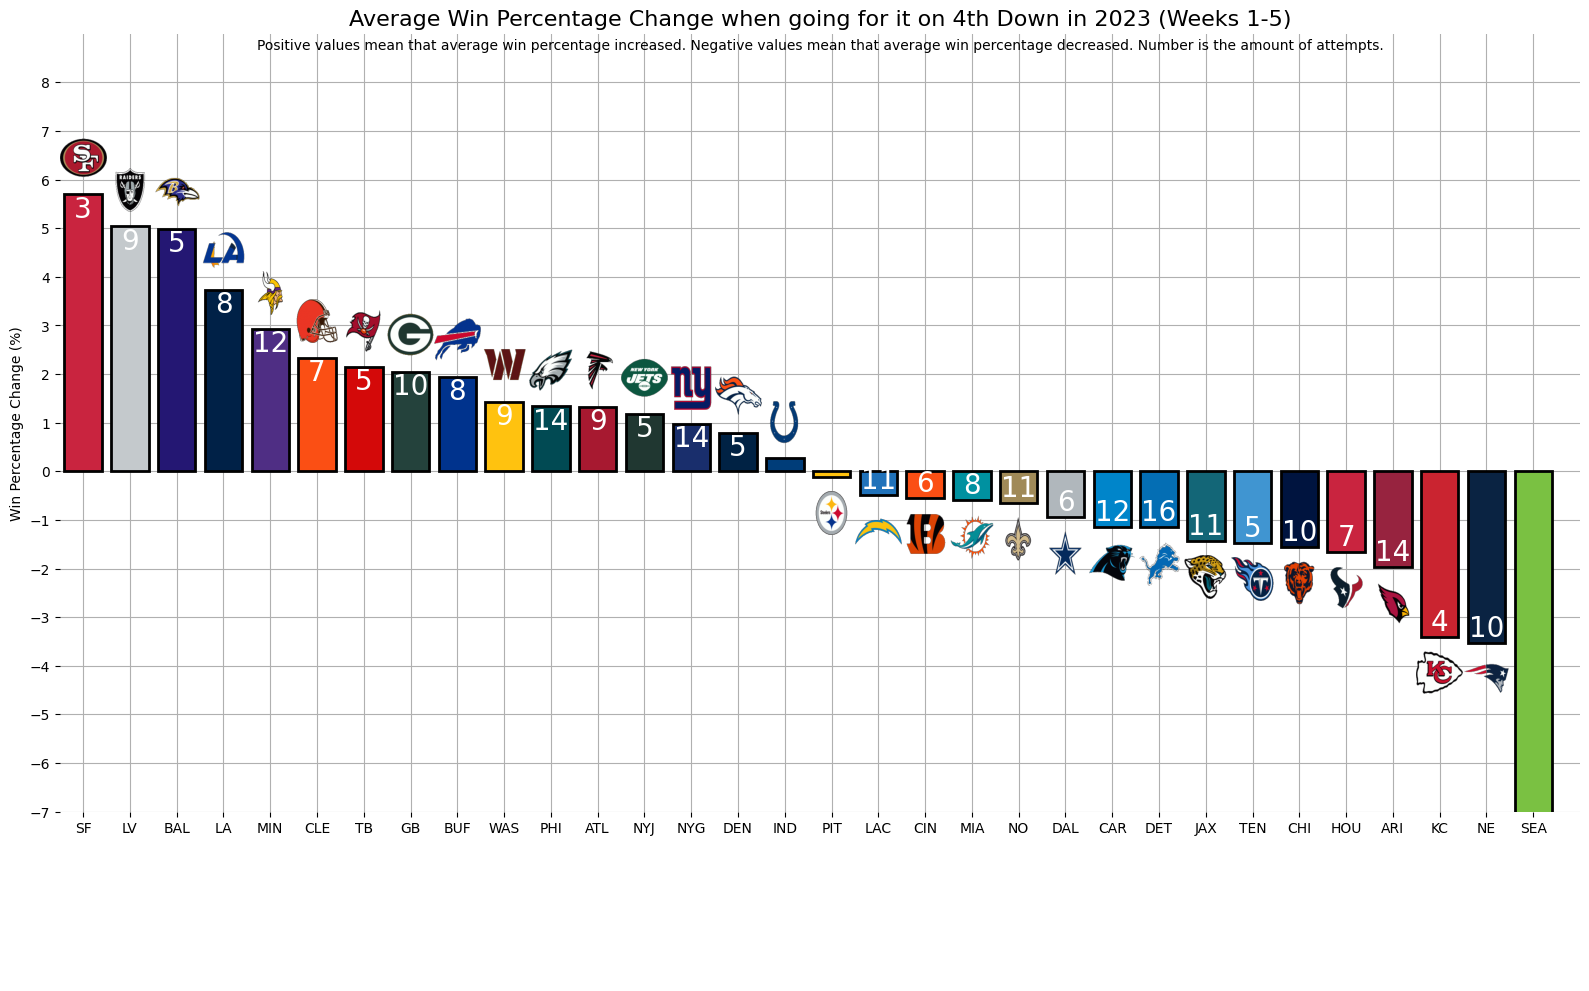

In [69]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in team_wp4th["posteam"]]

logo_images = []

for team in team_wp4th["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(team_wp4th["posteam"], team_wp4th["avg_wp4th"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# Add count
for i in range(len(team_wp4th["posteam"])):
  if (abs(team_wp4th["avg_wp4th"][i]) < 0.4):
      continue
  if (team_wp4th["avg_wp4th"][i] > 0):
    plt.text(i, team_wp4th["avg_wp4th"][i]-0.3, team_wp4th["total_go4th"][i], ha='center', va='center', color='w', fontsize=20, zorder = 30)
  if (team_wp4th["avg_wp4th"][i] < 0):
    plt.text(i, team_wp4th["avg_wp4th"][i]+0.3, team_wp4th["total_go4th"][i], ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(team_wp4th["posteam"])):

    logo_img = logo_images[i]

    if (team_wp4th["avg_wp4th"][i] > 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, team_wp4th["avg_wp4th"][i] + 0.3 , team_wp4th["avg_wp4th"][i] + 1.2], aspect='auto', zorder=7)
    if (team_wp4th["avg_wp4th"][i] < 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, team_wp4th["avg_wp4th"][i] - 1.2 , team_wp4th["avg_wp4th"][i] - 0.3], aspect='auto', zorder=7)



ax.set_ylabel('Win Percentage Change (%)')

# Add a main title
ax.set_title('Average Win Percentage Change when going for it on 4th Down in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'Positive values mean that average win percentage increased. Negative values mean that average win percentage decreased. Number is the amount of attempts.'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([-7, 9])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(-7, 9, 1))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [70]:
conv_4th = nfl.import_pbp_data([2023], downcast=True)

2023 done.
Downcasting floats.


In [71]:
conv_4th = conv_4th[conv_4th["down"] == 4.0]
conv_4th_group = conv_4th.groupby("posteam")["fourth_down_converted"].sum().reset_index()
fail_4th_group = conv_4th.groupby("posteam")["fourth_down_failed"].sum().reset_index()

conv_4th_group["4th_conv_percent"] = conv_4th_group["fourth_down_converted"] / (conv_4th_group["fourth_down_converted"] + fail_4th_group["fourth_down_failed"]) * 100
conv_4th_group["fourth_total"] = fail_4th_group["fourth_down_failed"] + conv_4th_group["fourth_down_converted"]

final_4th = conv_4th_group.sort_values(by = "4th_conv_percent", ascending = False).reset_index(drop = True)

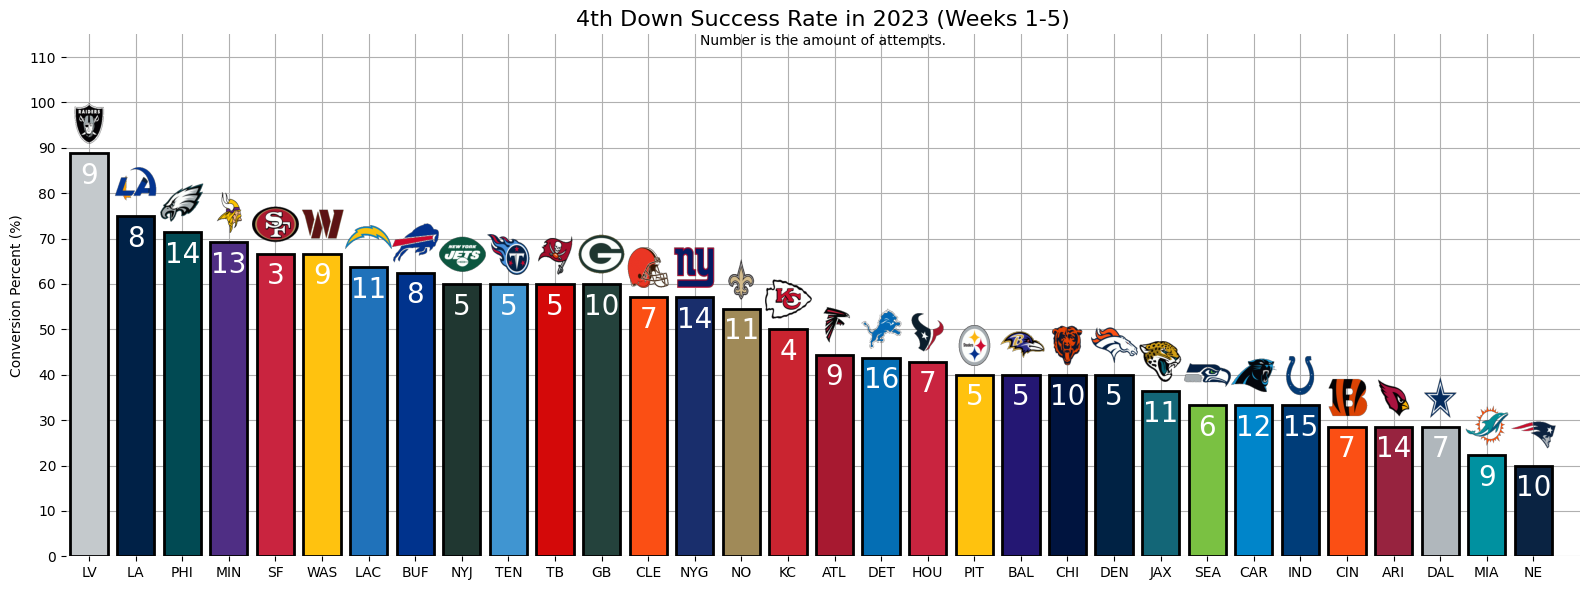

In [72]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in final_4th["posteam"]]

logo_images = []

for team in final_4th["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(final_4th["posteam"], final_4th["4th_conv_percent"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# Add count
for i in range(len(final_4th["posteam"])):
   plt.text(i, final_4th["4th_conv_percent"][i]-5, int(final_4th["fourth_total"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(final_4th["posteam"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, final_4th["4th_conv_percent"][i] + 2 , final_4th["4th_conv_percent"][i] + 11], aspect='auto', zorder=7)


ax.set_ylabel('Conversion Percent (%)')

# Add a main title
ax.set_title('4th Down Success Rate in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'Number is the amount of attempts.'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 115])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 115, 10))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


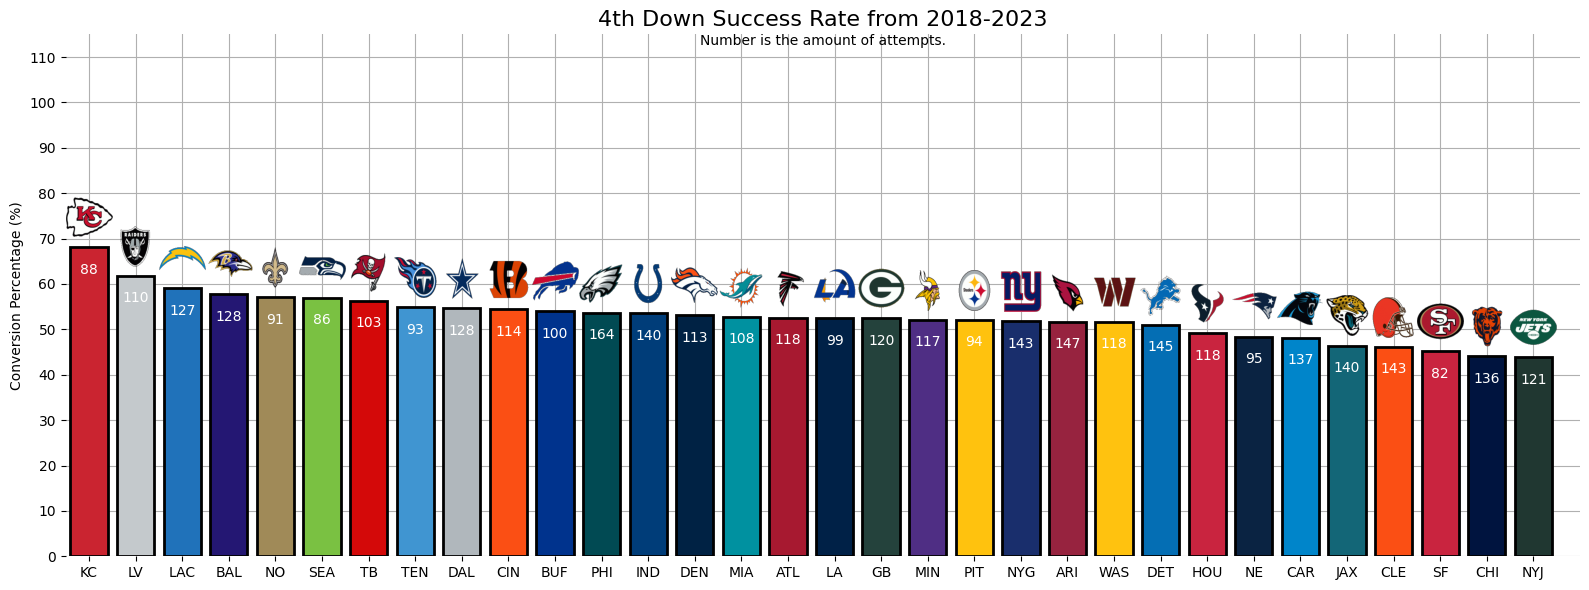

In [73]:
conv_4th = nfl.import_pbp_data(range(2018,2024), downcast=True)

conv_4th = conv_4th[conv_4th["down"] == 4.0]
conv_4th_group = conv_4th.groupby("posteam")["fourth_down_converted"].sum().reset_index()
fail_4th_group = conv_4th.groupby("posteam")["fourth_down_failed"].sum().reset_index()

conv_4th_group["4th_conv_percent"] = conv_4th_group["fourth_down_converted"] / (conv_4th_group["fourth_down_converted"] + fail_4th_group["fourth_down_failed"]) * 100
conv_4th_group["fourth_total"] = fail_4th_group["fourth_down_failed"] + conv_4th_group["fourth_down_converted"]

final_4th = conv_4th_group.sort_values(by = "4th_conv_percent", ascending = False).reset_index(drop = True)


teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in final_4th["posteam"]]

logo_images = []

for team in final_4th["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(final_4th["posteam"], final_4th["4th_conv_percent"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# Add count
for i in range(len(final_4th["posteam"])):
   plt.text(i, final_4th["4th_conv_percent"][i]-5, int(final_4th["fourth_total"][i]), ha='center', va='center', color='w', fontsize=10, zorder = 30)

# Add logo
for i in range(len(final_4th["posteam"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, final_4th["4th_conv_percent"][i] + 2 , final_4th["4th_conv_percent"][i] + 11], aspect='auto', zorder=7)


ax.set_ylabel('Conversion Percentage (%)')

# Add a main title
ax.set_title('4th Down Success Rate from 2018-2023', fontsize=16)

# Add a subtitle
subtitle = 'Number is the amount of attempts.'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 115])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 115, 10))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
pass_ngs = nfl.import_ngs_data("passing", [2023])
rec_ngs = nfl.import_ngs_data("receiving", [2023])

pass_ngs = pass_ngs[pass_ngs["week"] == 0]
rec_ngs = rec_ngs[rec_ngs["week"] == 0]

In [75]:
# Target Percentage

pd.set_option('display.max_rows', None)

attempts = pass_ngs.groupby("team_abbr")["attempts"].sum().reset_index()
attempts = attempts.sort_values(by = "team_abbr")

target_ngs = rec_ngs.sort_values(by = ["team_abbr", "targets"], ascending = [True, False])

target_ngs = target_ngs.groupby(by='team_abbr').head(2).sort_values(by='team_abbr')
target_ngs = target_ngs[["player_short_name","team_abbr", "targets"]].reset_index(drop=True)

attempts = pd.concat([attempts]*2)
attempts = attempts.sort_values(by='team_abbr').reset_index(drop=True)


target_ngs["target_percent"] = target_ngs["targets"] / attempts["attempts"] * 100
target_ngs["Rank"] = ["rec1", "rec2"]*32

target_ngs["team_abbr"].replace('LAR', 'LA', inplace=True)

target_ngs_piv = target_ngs.pivot(index='team_abbr', columns='Rank', values=["player_short_name", "target_percent"]).reset_index()

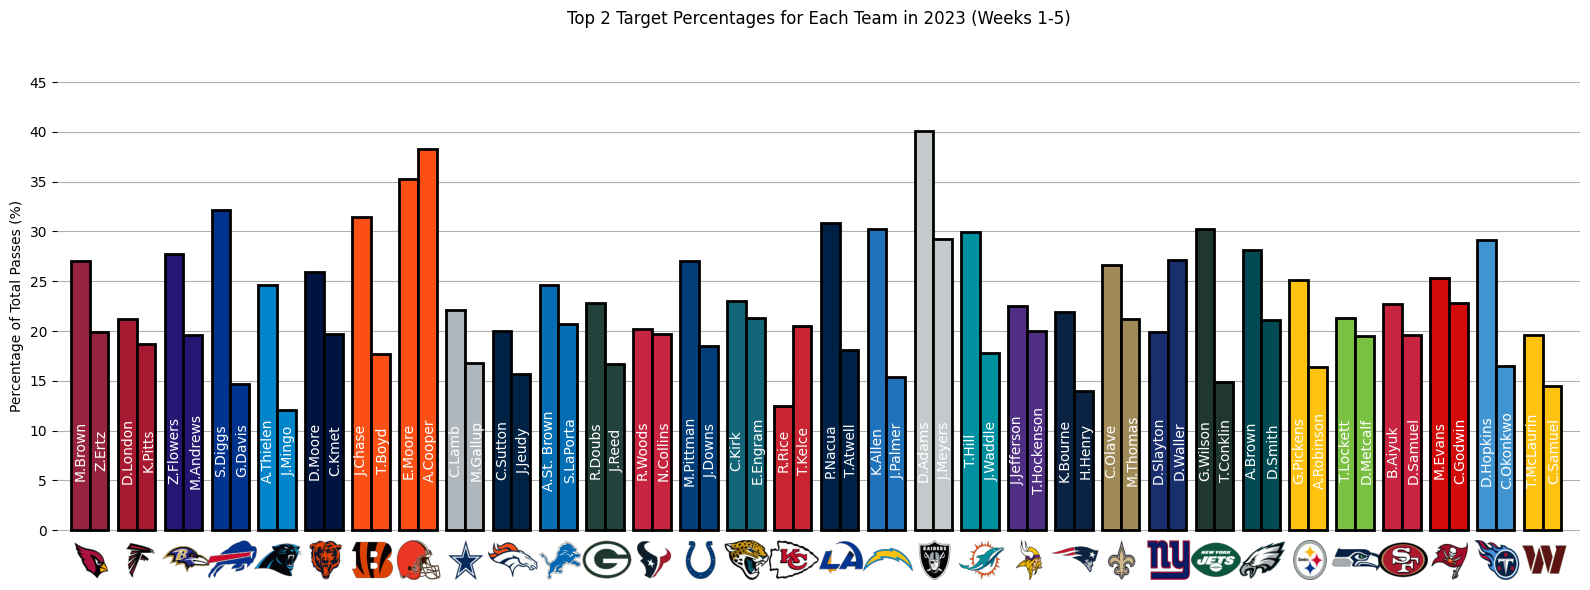

In [76]:
# Get the list of teams and their corresponding index
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in target_ngs_piv["team_abbr"]]

logo_images = []

for team in target_ngs_piv["team_abbr"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.4  # Width of each bar
fig, ax = plt.subplots(figsize=(16, 6))

for i, reciever in enumerate(['rec1', 'rec2']):
    recieve = target_ngs_piv["target_percent"][reciever]
    ax.bar([pos + i * width for pos in range(len(target_ngs_piv["team_abbr"]))], recieve, width=width, label=reciever, color=tm_colors, edgecolor='black', linewidth=2, zorder=5)

for i in range(len(target_ngs_piv["team_abbr"])):
  plt.text(i, 8, target_ngs_piv["player_short_name"]["rec1"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)
  plt.text(i+0.45, 8, target_ngs_piv["player_short_name"]["rec2"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)

for i in range(len(target_ngs_piv["team_abbr"])):

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i- 0.3,i + 0.75, -5 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Top 2 Target Percentages for Each Team in 2023 (Weeks 1-5)')

plt.ylim([-5, 50])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 50, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
# Reception Percentage

pd.set_option('display.max_rows', None)

complete = pass_ngs.groupby("team_abbr")["completions"].sum().reset_index()
complete = complete.sort_values(by = "team_abbr")

recs_ngs = rec_ngs.sort_values(by = ["team_abbr", "receptions"], ascending = [True, False])

recs_ngs = recs_ngs.groupby(by='team_abbr').head(2).sort_values(by='team_abbr')
recs_ngs = recs_ngs[["player_short_name","team_abbr", "receptions"]].reset_index(drop=True)

complete = pd.concat([complete]*2)
complete = complete.sort_values(by='team_abbr').reset_index(drop=True)

recs_ngs["rec_percent"] = recs_ngs["receptions"] / complete["completions"] * 100
recs_ngs["Rank"] = ["rec1", "rec2"]*32

recs_ngs["team_abbr"].replace('LAR', 'LA', inplace=True)

rec_ngs_piv = recs_ngs.pivot(index='team_abbr', columns='Rank', values=["player_short_name", "rec_percent"]).reset_index()

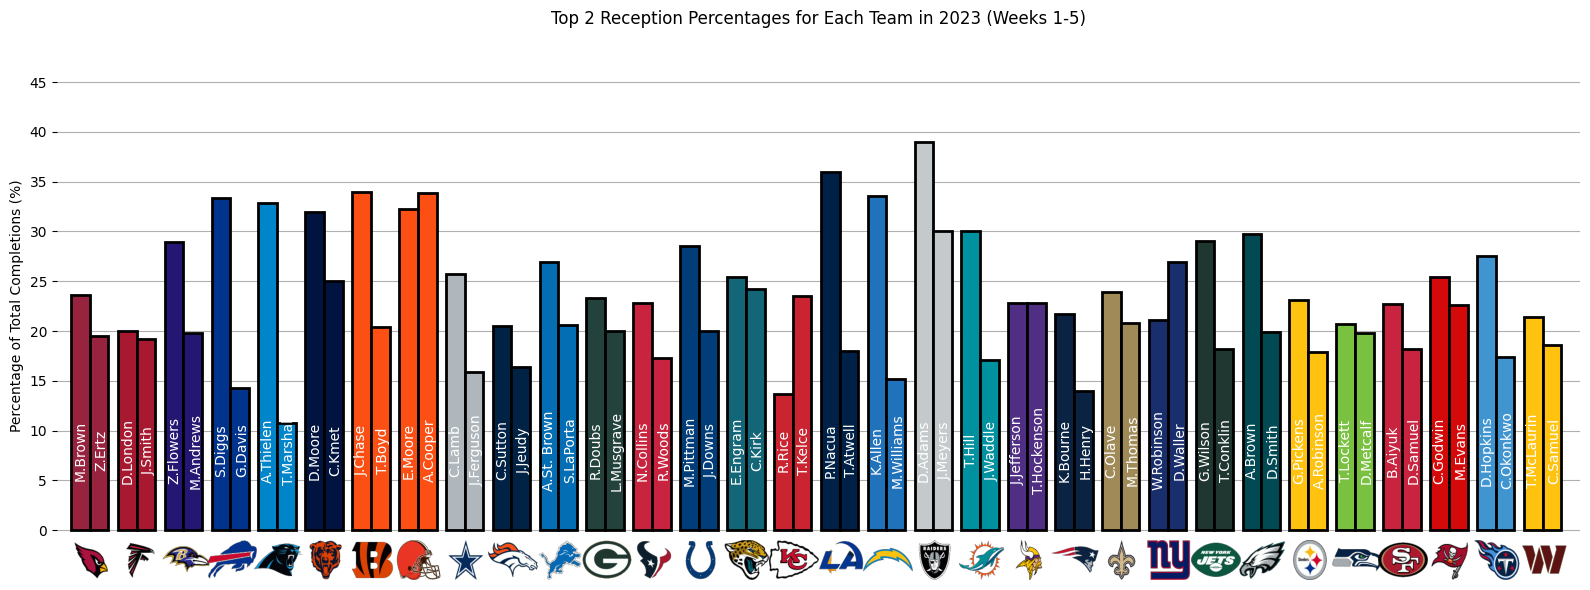

In [78]:
# Get the list of teams and their corresponding index
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in rec_ngs_piv["team_abbr"]]

logo_images = []

for team in rec_ngs_piv["team_abbr"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.4  # Width of each bar
fig, ax = plt.subplots(figsize=(16, 6))

for i, reciever in enumerate(['rec1', 'rec2']):
    recieve = rec_ngs_piv["rec_percent"][reciever]
    ax.bar([pos + i * width for pos in range(len(rec_ngs_piv["team_abbr"]))], recieve, width=width, label=reciever, color=tm_colors, edgecolor='black', linewidth=2, zorder=5)

for i in range(len(target_ngs_piv["team_abbr"])):
  plt.text(i, 8, rec_ngs_piv["player_short_name"]["rec1"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)
  plt.text(i+0.45, 8, rec_ngs_piv["player_short_name"]["rec2"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)

for i in range(len(rec_ngs_piv["team_abbr"])):

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i- 0.3,i + 0.75, -5 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Completions (%)')
ax.set_title('Top 2 Reception Percentages for Each Team in 2023 (Weeks 1-5)')

plt.ylim([-5, 50])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 50, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

TOP EPA/Play by Offensive team and personnel

In [79]:
form_pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [80]:
form_pbp_group = form_pbp.groupby(["posteam", "offense_formation"])["epa"].sum().reset_index()
play_group = form_pbp.groupby(["posteam","offense_formation"]).size().reset_index(name = "plays")

play_group = play_group[play_group["plays"] >= 30]

form_pbp_group["epa/play"] = form_pbp_group["epa"] / play_group["plays"]

form_pbp_group = form_pbp_group.dropna()
form_pbp_ranked = form_pbp_group.sort_values("epa/play", ascending=False)

best_pbp = form_pbp_ranked.head(10)
worst_pbp = form_pbp_ranked.tail(10)

best_worst_pbp = pd.concat([best_pbp, worst_pbp]).reset_index(drop = True)

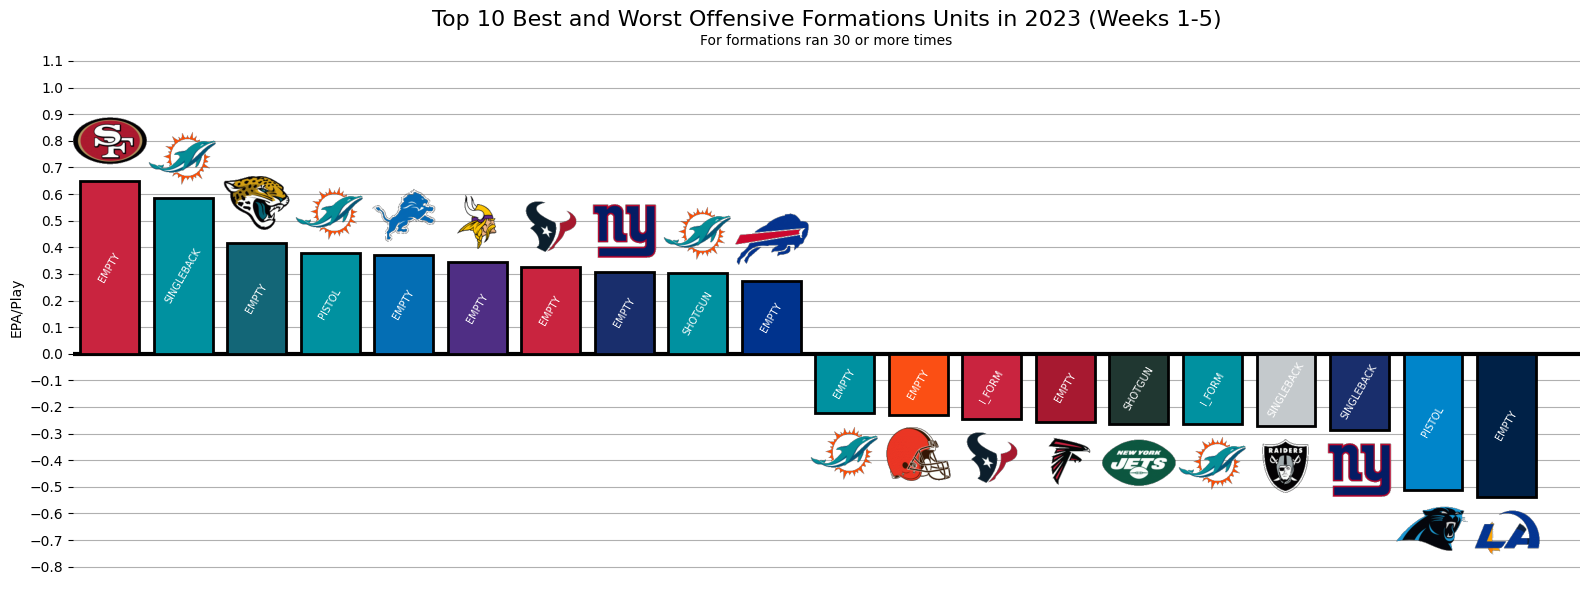

In [81]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in best_worst_pbp["posteam"]]

logo_images = []

for team in best_worst_pbp["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(best_worst_pbp.index, best_worst_pbp["epa/play"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(best_worst_pbp["posteam"])):
  if (best_worst_pbp["epa/play"][i] > 0):
    plt.text(i, best_worst_pbp["epa/play"][i] / 2, best_worst_pbp["offense_formation"][i], ha='center', va='center', rotation = 60, color='w', fontsize=7, zorder = 30)
  if (best_worst_pbp["epa/play"][i] < 0):
    plt.text(i, best_worst_pbp["epa/play"][i] / 2, best_worst_pbp["offense_formation"][i], ha='center', va='center', rotation = 60, color='w', fontsize=7, zorder = 30)

# Add logo
for i in range(len(best_worst_pbp["posteam"])):

    logo_img = logo_images[i]

    if (best_worst_pbp["epa/play"][i] > 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, best_worst_pbp["epa/play"][i] + 0.05 , best_worst_pbp["epa/play"][i] + 0.25], aspect='auto', zorder=7)
    if (best_worst_pbp["epa/play"][i] < 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, best_worst_pbp["epa/play"][i] - 0.25 , best_worst_pbp["epa/play"][i] - 0.05], aspect='auto', zorder=7)


ax.set_ylabel('EPA/Play')

# Add a main title
ax.set_title('Top 10 Best and Worst Offensive Formations Units in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'For formations ran 30 or more times'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim(-0.85,1.2)
plt.xlim([-0.5, 20])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(-0.8,1.2, 0.1))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
pbp_3rd = nfl.import_pbp_data([2023])

pbp_3rd = pbp_3rd[pbp_3rd["down"] == 3.0]
pbp_3rd = pbp_3rd[pbp_3rd["ydstogo"] >= 3]
pbp_3rd = pbp_3rd[pbp_3rd["play_type"] == "pass"]

2023 done.
Downcasting floats.


In [83]:
team_3rd_downs = pbp_3rd.groupby("posteam").size().reset_index(name = "count")
targets_3rd = pbp_3rd.groupby(["receiver", "posteam"]).size().reset_index(name = "targets")

rec_targets = targets_3rd.merge(team_3rd_downs, on="posteam")

rec_targets["target_percent"] = rec_targets["targets"] / rec_targets["count"] * 100


idx = rec_targets.groupby('posteam')['target_percent'].idxmax()

top_receivers = rec_targets.loc[idx].sort_values(by = "target_percent", ascending=False).reset_index()

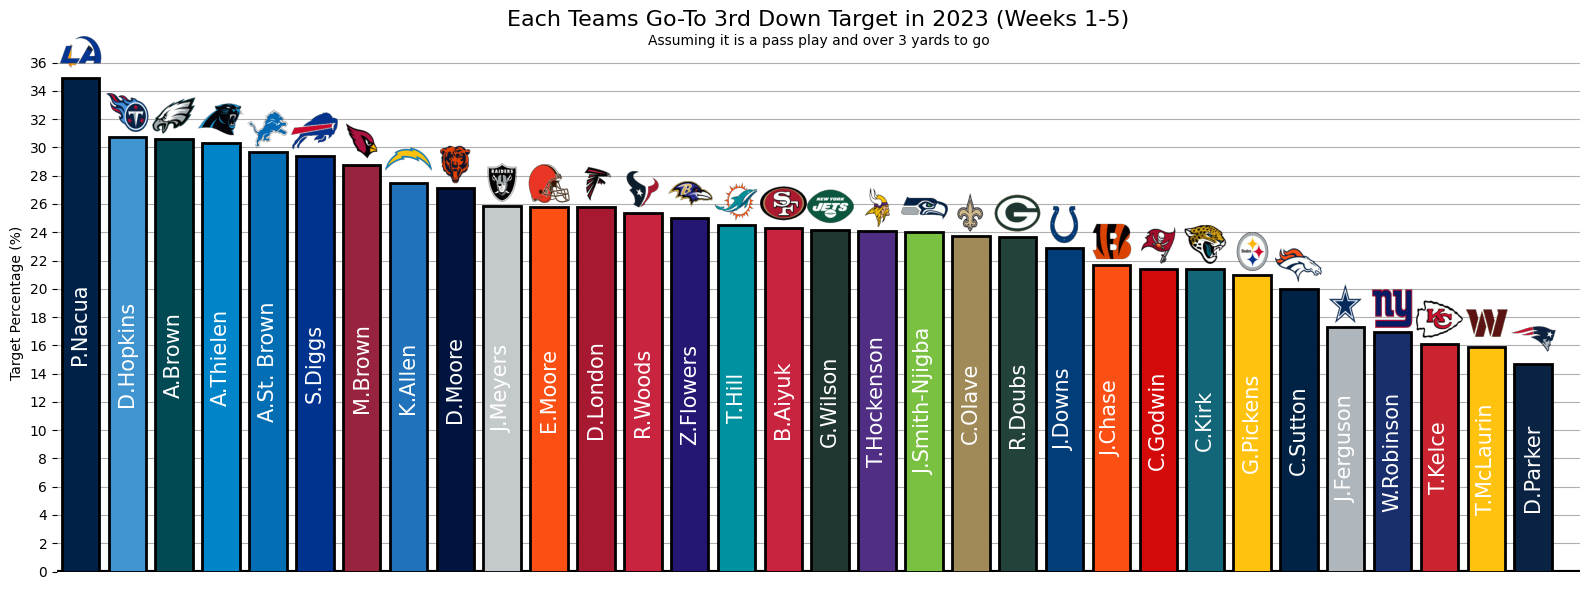

In [84]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in top_receivers["posteam"]]

logo_images = []

for team in top_receivers["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(top_receivers.index, top_receivers["target_percent"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(top_receivers["posteam"])):
    plt.text(i, top_receivers["target_percent"][i] / 2, top_receivers["receiver"][i], ha='center', va='center', rotation = 90, color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(top_receivers["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, top_receivers["target_percent"][i] + 0.3 , top_receivers["target_percent"][i] + 3], aspect='auto', zorder=7)


ax.set_ylabel('Target Percentage (%)')

# Add a main title
ax.set_title('Each Teams Go-To 3rd Down Target in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'Assuming it is a pass play and over 3 yards to go'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim(0,38)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,38, 2))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [85]:
pbp_3rd = nfl.import_pbp_data(range(2013, 2024))

pbp_3rd = pbp_3rd[pbp_3rd["down"] == 3.0]
pbp_3rd = pbp_3rd[pbp_3rd["play_type"] == "pass"]

2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [86]:
team_3rd_downs = pbp_3rd.groupby("posteam").size().reset_index(name = "count")
targets_3rd = pbp_3rd.groupby(["receiver", "posteam"]).size().reset_index(name = "targets")

rec_targets = targets_3rd.merge(team_3rd_downs, on="posteam")

rec_targets["target_percent"] = rec_targets["targets"] / rec_targets["count"] * 100


idx = rec_targets.groupby('posteam')['target_percent'].idxmax()

top_receivers = rec_targets.loc[idx].sort_values(by = "target_percent", ascending=False).reset_index()

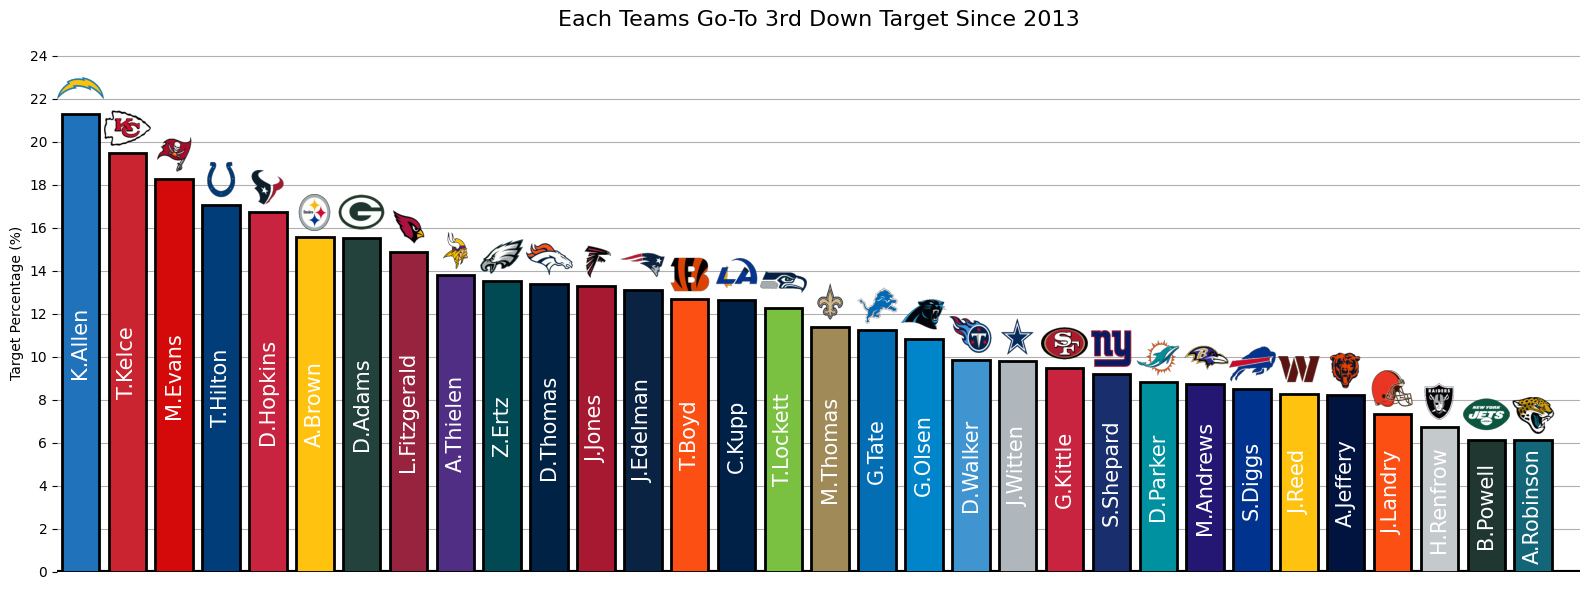

In [87]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in top_receivers["posteam"]]

logo_images = []

for team in top_receivers["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(top_receivers.index, top_receivers["target_percent"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(top_receivers["posteam"])):
    plt.text(i, top_receivers["target_percent"][i] / 2, top_receivers["receiver"][i], ha='center', va='center', rotation = 90, color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(top_receivers["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, top_receivers["target_percent"][i] + 0.3 , top_receivers["target_percent"][i] + 2], aspect='auto', zorder=7)


ax.set_ylabel('Target Percentage (%)')

# Add a main title
ax.set_title('Each Teams Go-To 3rd Down Target Since 2013', fontsize=16)


plt.ylim(0,25)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,25, 2))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [88]:
red_stats = nfl.import_pbp_data([2023])

redzone = red_stats[red_stats["drive_inside20"] == 1.0]
redzone_td = redzone[redzone["touchdown"] == 1.0]

redzone_drives = redzone.groupby("posteam")["drive_real_start_time"].nunique().reset_index()
redzone_tds = redzone_td.groupby("posteam")["touchdown"].size().reset_index()

redzone_tds["redzone_eff"] = redzone_tds["touchdown"] / redzone_drives["drive_real_start_time"] * 100

redzone_tds = redzone_tds.sort_values("redzone_eff", ascending=False).reset_index(drop = True)

redzone_tds = pd.merge(redzone_tds, redzone_drives, on='posteam', how='left')
redzone_tds = redzone_tds.rename(columns={"drive_real_start_time": "redzone_drives"})

2023 done.
Downcasting floats.


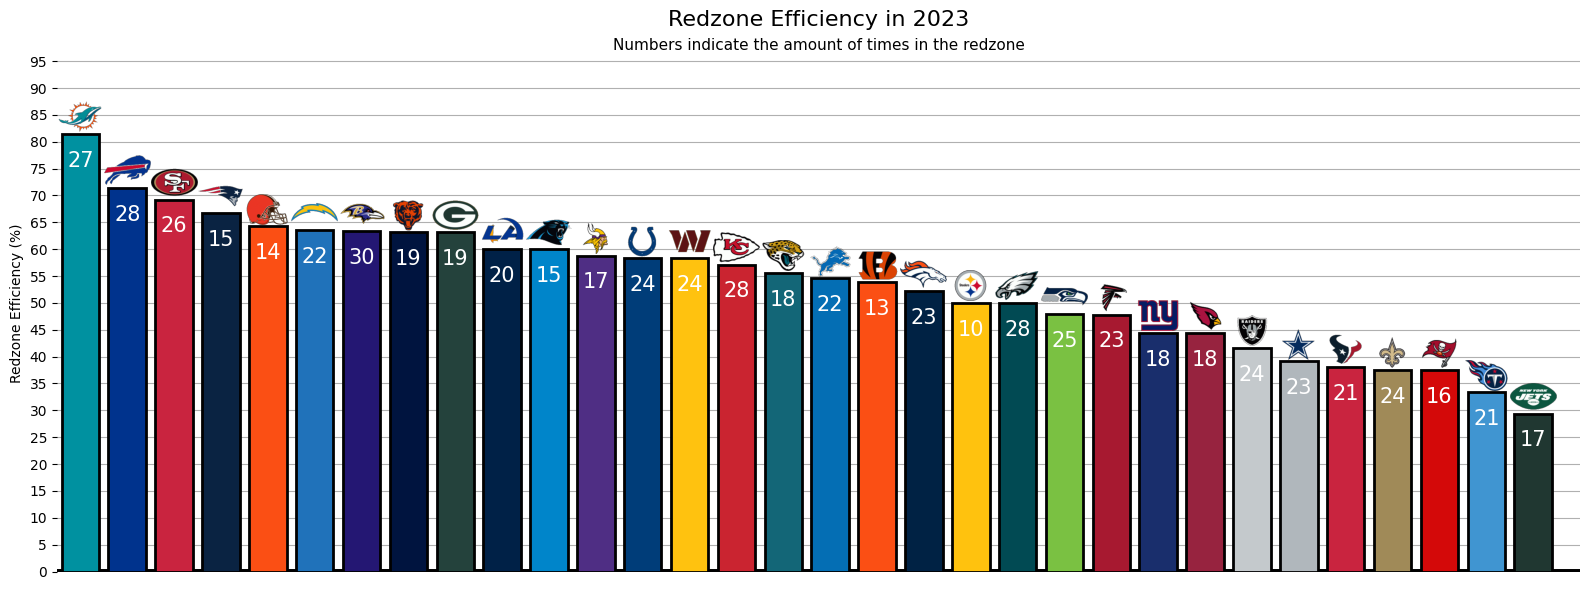

In [89]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in redzone_tds["posteam"]]

logo_images = []

for team in redzone_tds["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(redzone_tds.index, redzone_tds["redzone_eff"], width=0.8, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 5)

# Add count
for i in range(len(redzone_tds["posteam"])):
    plt.text(i, redzone_tds["redzone_eff"][i] - 5, int(redzone_tds["redzone_drives"][i]), ha='center', va='center', color='w', fontsize=15, zorder = 30)

# Add logo
for i in range(len(redzone_tds["posteam"])):

    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, redzone_tds["redzone_eff"][i] + 0.3 , redzone_tds["redzone_eff"][i] + 6], aspect='auto', zorder=7)


ax.set_ylabel('Redzone Efficiency (%)')

# Add a main title
ax.set_title('Redzone Efficiency in 2023', fontsize=16)

# Add subtitle
subtitle = 'Numbers indicate the amount of times in the redzone'
plt.text(0.5, 0.97, subtitle, fontsize=11, ha='center', transform=ax.transAxes)


plt.ylim(0,100)
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(0,100, 5))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [90]:
gm = nfl.import_pbp_data([2023])
lac_min = gm[gm["game_id"] == "2023_03_LAC_MIN"]

lac_min.head(5)

2023 done.
Downcasting floats.


play_id          game_id old_game_id home_team away_team season_type  \
7127      1.0  2023_03_LAC_MIN  2023092406       MIN       LAC         REG   
7128     39.0  2023_03_LAC_MIN  2023092406       MIN       LAC         REG   
7129     55.0  2023_03_LAC_MIN  2023092406       MIN       LAC         REG   
7130     77.0  2023_03_LAC_MIN  2023092406       MIN       LAC         REG   
7131    115.0  2023_03_LAC_MIN  2023092406       MIN       LAC         REG   

      week posteam posteam_type defteam side_of_field  yardline_100  \
7127     3    None         None    None          None           NaN   
7128     3     LAC         away     MIN           MIN          35.0   
7129     3     LAC         away     MIN           LAC          75.0   
7130     3     LAC         away     MIN           LAC          73.0   
7131     3     LAC         away     MIN           LAC          83.0   

       game_date  quarter_seconds_remaining  half_seconds_remaining  \
7127  2023-09-24                      900.0                  1800.0   
7128  2023-09-24                      900.0                  1800.0   
7129  2023-09-24                      900.0                  1800.0   
7130  2023-09-24                      868.0                  1768.0   
7131  2023-09-24                      848.0                  1748.0   

      game_seconds_remaining game_half  quarter_end  drive   sp  qtr  down  \
7127                  3600.0     Half1          0.0    NaN  0.0  1.0   NaN   
7128                  3600.0     Half1          0.0    1.0  0.0  1.0   NaN   
7129                  3600.0     Half1          0.0    1.0  0.0  1.0   1.0   
7130                  3568.0     Half1          0.0    1.0  0.0  1.0   2.0   
7131                  3548.0     Half1          0.0    1.0  0.0  1.0   2.0   

      goal_to_go   time   yrdln  ydstogo  ydsnet  \
7127         0.0  15:00  MIN 35      0.0     NaN   
7128         0.0  15:00  MIN 35      0.0     5.0   
7129         0.0  15:00  LAC 25     10.0     5.0   
7130         0.0  14:28  LAC 27      8.0     5.0   
7131         0.0  14:08  LAC 17     18.0     5.0   

                                                   desc play_type  \
7127                                               GAME      None   
7128  1-G.Joseph kicks 65 yards from MIN 35 to end z...   kickoff   
7129  (15:00) (Shotgun) 25-J.Kelley up the middle to...       run   
7130  (14:28) (Shotgun) 25-J.Kelley left end pushed ...   no_play   
7131  (14:08) (Shotgun) 10-J.Herbert pass short righ...      pass   

      yards_gained  shotgun  no_huddle  qb_dropback  qb_kneel  qb_spike  \
7127           NaN      0.0        0.0          NaN       0.0       0.0   
7128           0.0      0.0        0.0          0.0       0.0       0.0   
7129           2.0      1.0        0.0          0.0       0.0       0.0   
7130           0.0      1.0        0.0          0.0       0.0       0.0   
7131           7.0      1.0        0.0          1.0       0.0       0.0   

      qb_scramble pass_length pass_location  air_yards  yards_after_catch  \
7127          0.0        None          None        NaN                NaN   
7128          0.0        None          None        NaN                NaN   
7129          0.0        None          None        NaN                NaN   
7130          0.0        None          None        NaN                NaN   
7131          0.0       short         right        7.0                0.0   

     run_location run_gap field_goal_result  kick_distance extra_point_result  \
7127         None    None              None            NaN               None   
7128         None    None              None           65.0               None   
7129       middle    None              None            NaN               None   
7130         None    None              None            NaN               None   
7131         None    None              None            NaN               None   

     two_point_conv_result  home_timeouts_remaining  away_timeouts_remaining  \
7127 

In [91]:
lac_min = lac_min[["posteam","play_type", "drive", "time", "yardline_100"]]

lac_min = lac_min[lac_min["play_type"] == "pass"]
lac_min = lac_min[lac_min["play_type"] == "run"]
# lac_min = lac_min[lac_min["play_type"] == "no_play"]

lac_min.head()

Empty DataFrame
Columns: [posteam, play_type, drive, time, yardline_100]
Index: []

In [92]:
stats = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)
stats.head()

2023 done.
Downcasting floats.


play_id          game_id old_game_id home_team away_team season_type  week  \
0      1.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
1     39.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
2     55.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
3     77.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   
4    102.0  2023_01_ARI_WAS  2023091007       WAS       ARI         REG     1   

  posteam posteam_type defteam side_of_field  yardline_100   game_date  \
0    None         None    None          None           NaN  2023-09-10   
1     WAS         home     ARI           ARI          35.0  2023-09-10   
2     WAS         home     ARI           WAS          75.0  2023-09-10   
3     WAS         home     ARI           WAS          72.0  2023-09-10   
4     WAS         home     ARI           WAS          66.0  2023-09-10   

   quarter_seconds_remaining  half_seconds_remaining  game_seconds_remaining  \
0                      900.0                  1800.0                  3600.0   
1                      900.0                  1800.0                  3600.0   
2                      900.0                  1800.0                  3600.0   
3                      870.0                  1770.0                  3570.0   
4                      835.0                  1735.0                  3535.0   

  game_half  quarter_end  drive   sp  qtr  down  goal_to_go   time   yrdln  \
0     Half1          0.0    NaN  0.0  1.0   NaN         0.0  15:00  ARI 35   
1     Half1          0.0    1.0  0.0  1.0   NaN         0.0  15:00  ARI 35   
2     Half1          0.0    1.0  0.0  1.0   1.0         0.0  15:00  WAS 25   
3     Half1          0.0    1.0  0.0  1.0   2.0         0.0  14:30  WAS 28   
4     Half1          0.0    1.0  0.0  1.0   3.0         0.0  13:55  WAS 34   

   ydstogo  ydsnet                                               desc  \
0      0.0     NaN                                               GAME   
1      0.0    26.0  5-M.Prater kicks 65 yards from ARI 35 to end z...   
2     10.0    26.0  (15:00) (Shotgun) 8-B.Robinson right tackle to...   
3      7.0    26.0  (14:30) (Shotgun) 14-S.Howell pass short right...   
4      1.0    26.0  (13:55) 23-C.Rodriguez left guard to WAS 36 fo...   

  play_type  yards_gained  shotgun  no_huddle  qb_dropback  qb_kneel  \
0      None           NaN      0.0        0.0          NaN       0.0   
1   kickoff           0.0      0.0        0.0          0.0       0.0   
2       run           3.0      1.0        0.0          0.0       0.0   
3      pass           6.0      1.0        0.0          1.0       0.0   
4       run           2.0      0.0        0.0          0.0       0.0   

   qb_spike  qb_scramble pass_length pass_location  air_yards  \
0       0.0          0.0        None          None        NaN   
1       0.0          0.0        None          None        NaN   
2       0.0          0.0        None          None        NaN   
3       0.0          0.0       short         right        6.0   
4       0.0          0.0        None          None        NaN   

   yards_after_catch run_location run_gap field_goal_result  kick_distance  \
0                NaN         None    None              None            NaN   
1                NaN         None    None              None           65.0   
2                NaN        right  tackle              None            NaN   
3                0.0         None    None              None            NaN   
4                NaN         left   guard              None            NaN   

  extra_point_result two_point_conv_result  home_timeouts_remaining  \
0               None                  None                      3.0   
1               None                  None                      3.0   
2               None                  None                      3.0   
3               None                  None                      3.0   
4               None              

In [93]:
# SUCCESS
passing = stats[stats["play_type"] == "pass"]
rushing = stats[stats["play_type"] == "run"]

passing_total = passing.groupby("posteam").size().reset_index(name = "pass_plays")
pass_success = passing.groupby("posteam")["success"].sum().reset_index()

pass_success["pass_success_percent"] = pass_success["success"] / passing_total["pass_plays"] * 100

rushing_total = rushing.groupby("posteam").size().reset_index(name = "run_plays")
rushing_success = rushing.groupby("posteam")["success"].sum().reset_index()

rushing_success["rush_success_percent"] = rushing_success["success"] / rushing_total["run_plays"] * 100

pass_success = pass_success.sort_values("pass_success_percent", ascending=False).reset_index(drop = True)
rushing_success = rushing_success.sort_values("rush_success_percent", ascending=False).reset_index(drop = True)

pass_success = pass_success.rename(columns={"posteam": "team"})
rushing_success = rushing_success.rename(columns={"posteam": "team"})

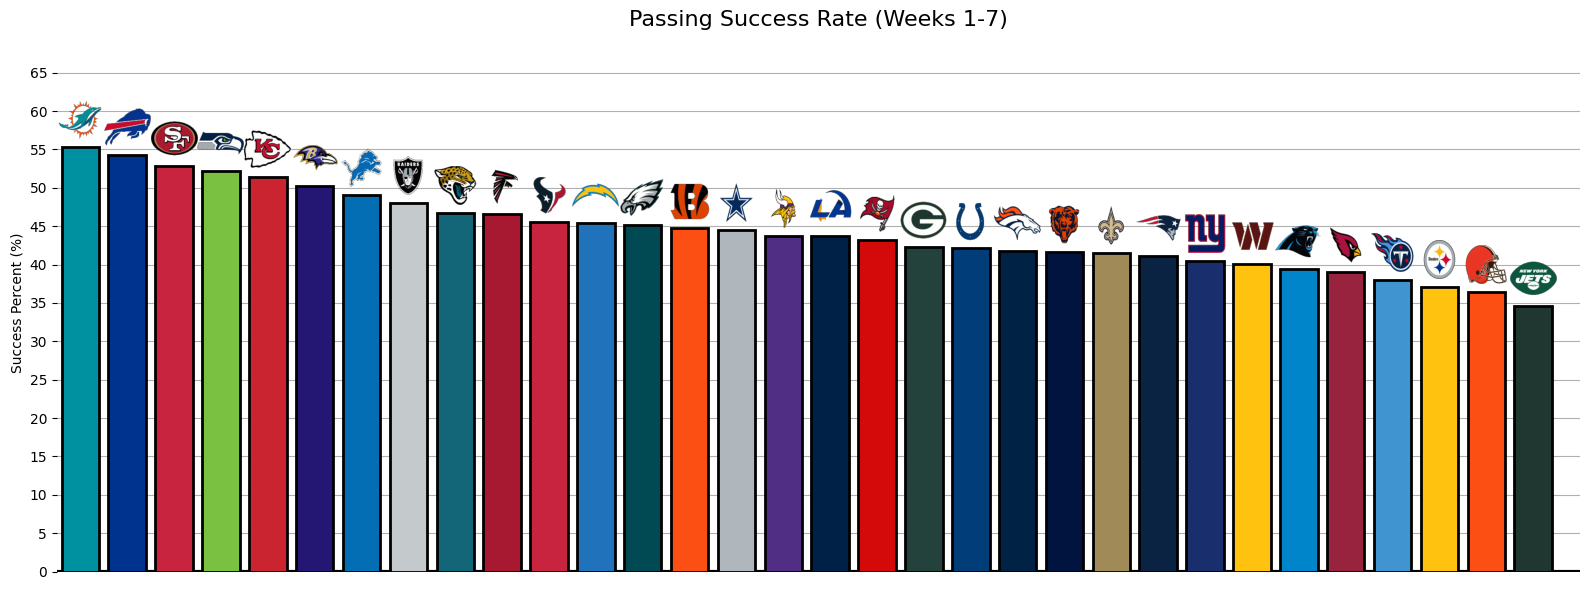

In [109]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in pass_success["team"]]

logo_images = []

for team in pass_success["team"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(pass_success["team"],pass_success["pass_success_percent"] , width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# # Add count
# for i in range(len(final_4th["posteam"])):
#    plt.text(i, pass_success["pass_success_percent"][i]-5, int(pass_success["pass_success_percent"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(pass_success["team"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, pass_success["pass_success_percent"][i] + 1 , pass_success["pass_success_percent"][i] + 6], aspect='auto', zorder=7)


ax.set_ylabel('Success Percent (%)')

# Add a main title
ax.set_title('Passing Success Rate (Weeks 1-7)', fontsize=16)

ax.axhline(y=0, color="k", linewidth=3)

# Add a subtitle
# subtitle = 'Number is the amount of attempts.'
# plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 70])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 70, 5))
plt.xticks([])

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

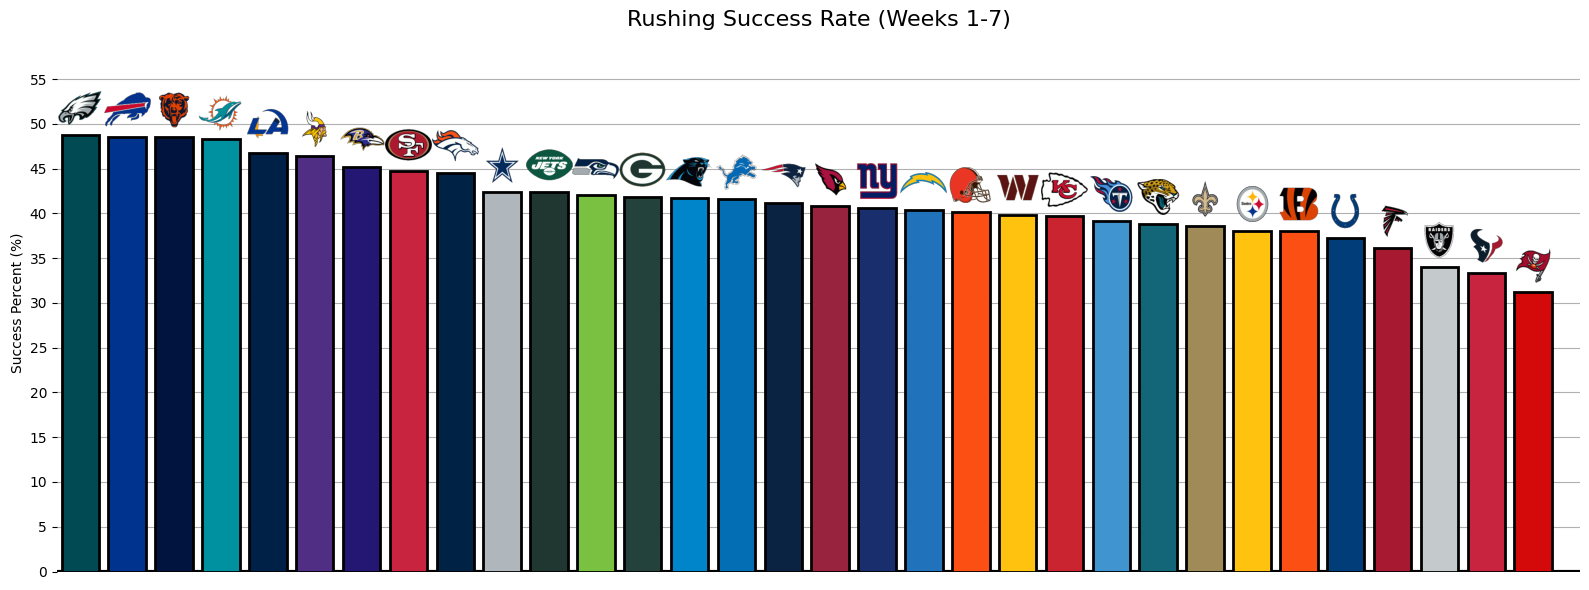

In [110]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in rushing_success["team"]]

logo_images = []

for team in rushing_success["team"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(rushing_success["team"],rushing_success["rush_success_percent"] , width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# # Add count
# for i in range(len(final_4th["posteam"])):
#    plt.text(i, pass_success["pass_success_percent"][i]-5, int(pass_success["pass_success_percent"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(rushing_success["team"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, rushing_success["rush_success_percent"][i] + 1 , rushing_success["rush_success_percent"][i] + 5], aspect='auto', zorder=7)

ax.axhline(y=0, color="k", linewidth=3)

ax.set_ylabel('Success Percent (%)')

# Add a main title
ax.set_title('Rushing Success Rate (Weeks 1-7)', fontsize=16)

# Add a subtitle
# subtitle = 'Number is the amount of attempts.'
# plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 60, 5))
plt.xticks([])

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()